<hr />

## Universidade Federal do Ceará - Pós-Graduação em Segurança da Informação
Atividade 3 - Detecção de Ataques Cibernéticos: Segurança Defensiva

<hr />

# Detecção de Ataques Cibernéticos: Segurança Defensiva

<hr />

## Grupo 6:

#### Davi Oliveira Lopes -  Matrícula: 543032
#### Kelvin Sampaio Lopes-  Matrícula: 543049
#### Wesley Gomes Pinto Pavanello -  Matrícula: 543027

<hr />

## DATASET ANÁLISE DE TRÁFEGO DE DADOS E MULTIMÍDIA

#### Wiresharke: https://www.wireshark.org/download.html

## Objetivo

### <p style='text-align: justify;'>Realizar uma análise em um dataset que contém dados de capturados pelo tráfego de rede utilizando  o CICFlowMeter considerando a seguinte divisão:
> Multimídia: Vídeos de streaming (Youtube, Netflix, Primevideo, etc) ou chamadas de vídeo (via Zoom, Google Meets, Whatsapp, etc);<br> - <strong>Acesso via plataforma web Youtube para reprodução de vídeos de streaming</strong>
    
> Data: Páginas web, download de arquivos, P2P, etc);<br> - <strong>Aplicação Telegram para download de arquivos</strong></p>

Captura realizada do trafégo de rede em:<br> 
- Vídeo de streaming (Youtube) na qualidade 1080p [4 horas]
- Download de arquivos (Telegram) [10 minutos]

## Leitura de arquivos com dados

Normalmente os dados na disciplina serão recebidos no formato CSV. Isso significa que o dado é estruturado da seguinte maneira:
```
cabeçalho1, cabeçalho2 # Um cabeçalho opcional
# Dados do dataset por coluna
....
```

In [1]:
 # Importação das Bibliotecas
# Visualização
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
# Por default o tamanho é maior da figura
plt.style.use('default')
plt.style.use('seaborn')
# plt.style.use('seaborn-v0_8')
import scipy.stats as stats
import seaborn as sns
import random
from numpy import random

# Modelos de Classificação
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm

# Métricas de classificação
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    roc_curve,
    roc_auc_score  
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

### Junção dos arquivos capturados CICFlowerMeter

### Multimedia

In [12]:
df1 = pd.read_csv('Arquivos de Captura/trafego_multimedia.csv',  delimiter=',', header=0)

In [13]:
df1.shape

(1127, 84)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow ID            1127 non-null   object 
 1   Src IP             1127 non-null   object 
 2   Src Port           1127 non-null   int64  
 3   Dst IP             1127 non-null   object 
 4   Dst Port           1127 non-null   int64  
 5   Protocol           1127 non-null   int64  
 6   Timestamp          1127 non-null   object 
 7   Flow Duration      1127 non-null   int64  
 8   Tot Fwd Pkts       1127 non-null   int64  
 9   Tot Bwd Pkts       1127 non-null   int64  
 10  TotLen Fwd Pkts    1127 non-null   float64
 11  TotLen Bwd Pkts    1127 non-null   float64
 12  Fwd Pkt Len Max    1127 non-null   float64
 13  Fwd Pkt Len Min    1127 non-null   float64
 14  Fwd Pkt Len Mean   1127 non-null   float64
 15  Fwd Pkt Len Std    1127 non-null   float64
 16  Bwd Pkt Len Max    1127 

In [15]:
df1 = df1[~df1.isin([np.nan, np.inf, -np.inf]).any(1)]

<strong>Observação:<strong>

> Exclusão para não conter dados infinitos.

In [16]:
df1.shape

(1119, 84)

In [17]:
df1.iloc[0:1119]

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.100.15-108.158.153.29-49726-80-6,192.168.100.15,49726,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68522,0,2,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label
1,192.168.100.15-108.158.153.29-49727-80-6,192.168.100.15,49727,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68693,0,2,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label
2,192.168.100.15-66.203.125.13-49703-443-6,192.168.100.15,49703,66.203.125.13,443,6,21/01/2023 12:50:03 PM,70,1,1,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label
3,192.168.100.15-66.203.125.13-49703-443-6,66.203.125.13,443,192.168.100.15,49703,6,21/01/2023 12:50:04 PM,1,2,1,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label
4,192.168.100.15-13.69.239.73-49795-443-6,192.168.100.15,49795,13.69.239.73,443,6,21/01/2023 12:50:08 PM,1602674,15,13,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,192.168.100.15-66.203.127.11-50245-80-6,192.168.100.15,50245,66.203.127.11,80,6,21/01/2023 04:48:03 PM,65537425,5,41,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label
1123,192.168.100.15-66.203.127.11-50245-80-6,192.168.100.15,50245,66.203.127.11,80,6,21/01/2023 04:49:08 PM,173,1,1,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label
1124,192.168.100.15-108.128.72.146-50247-443-6,192.168.100.15,50247,108.128.72.146,443,6,21/01/2023 04:48:10 PM,60938357,9,14,...,0,312383.5,463875.723182,982149.0,152.0,14922205.75,415896.974106,15268251.0,14432686.0,No Label
1125,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,21/01/2023 04:33:52 PM,2151760,4,1,...,0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,No Label


In [18]:
# Acrescentar coluna com registro padrão
df1 = df1.assign(Tipo='multimedia').iloc[0:1119]

In [19]:
df1.shape

(1119, 85)

In [20]:
# Verificar os 5 primeiros registros
df1.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Tipo
0,192.168.100.15-108.158.153.29-49726-80-6,192.168.100.15,49726,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68522,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,multimedia
1,192.168.100.15-108.158.153.29-49727-80-6,192.168.100.15,49727,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68693,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,multimedia
2,192.168.100.15-66.203.125.13-49703-443-6,192.168.100.15,49703,66.203.125.13,443,6,21/01/2023 12:50:03 PM,70,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,multimedia
3,192.168.100.15-66.203.125.13-49703-443-6,66.203.125.13,443,192.168.100.15,49703,6,21/01/2023 12:50:04 PM,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,multimedia
4,192.168.100.15-13.69.239.73-49795-443-6,192.168.100.15,49795,13.69.239.73,443,6,21/01/2023 12:50:08 PM,1602674,15,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,multimedia


In [21]:
# converting to CSV file
df1.to_csv("Junção de Arquivos/dataset1_multimedia.csv", index = False)

### Dados

In [22]:
df2 = pd.read_csv('Arquivos de Captura/trafego_dados.csv',  delimiter=',', header=0)

In [23]:
df2.shape

(1543, 84)

In [24]:
# df = df.isin([np.inf, -np.inf])
# df
df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]

<strong>Observação:<strong>

> Exclusão para não conter dados infinitos.

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1542
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow ID            1534 non-null   object 
 1   Src IP             1534 non-null   object 
 2   Src Port           1534 non-null   int64  
 3   Dst IP             1534 non-null   object 
 4   Dst Port           1534 non-null   int64  
 5   Protocol           1534 non-null   int64  
 6   Timestamp          1534 non-null   object 
 7   Flow Duration      1534 non-null   int64  
 8   Tot Fwd Pkts       1534 non-null   int64  
 9   Tot Bwd Pkts       1534 non-null   int64  
 10  TotLen Fwd Pkts    1534 non-null   float64
 11  TotLen Bwd Pkts    1534 non-null   float64
 12  Fwd Pkt Len Max    1534 non-null   float64
 13  Fwd Pkt Len Min    1534 non-null   float64
 14  Fwd Pkt Len Mean   1534 non-null   float64
 15  Fwd Pkt Len Std    1534 non-null   float64
 16  Bwd Pkt Len Max    1534 

In [26]:
df2.iloc[0:1534]

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.100.15-192.168.100.120-55655-80-6,192.168.100.15,55655,192.168.100.120,80,6,19/01/2023 02:48:55 PM,344444,4,5,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label
1,192.168.100.15-192.168.100.120-55655-80-6,192.168.100.120,80,192.168.100.15,55655,6,19/01/2023 02:48:56 PM,9566,1,1,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label
2,192.168.100.15-192.168.100.120-55658-80-6,192.168.100.15,55658,192.168.100.120,80,6,19/01/2023 02:49:00 PM,300834,4,5,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label
3,192.168.100.15-192.168.100.120-55658-80-6,192.168.100.120,80,192.168.100.15,55658,6,19/01/2023 02:49:00 PM,12335,1,1,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label
4,192.168.100.15-192.168.100.120-55659-80-6,192.168.100.15,55659,192.168.100.120,80,6,19/01/2023 02:49:04 PM,334751,4,5,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,192.168.100.15-192.168.100.120-58159-80-6,192.168.100.15,58159,192.168.100.120,80,6,19/01/2023 03:57:01 PM,484068,2,3,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label
1539,192.168.100.15-108.128.72.146-57965-443-6,192.168.100.15,57965,108.128.72.146,443,6,19/01/2023 03:56:04 PM,61132832,7,6,...,0,375522.5,573745.720236,1211345.0,158.0,14907685.0,447581.073281,15294792.0,14385515.0,No Label
1540,192.168.100.15-192.168.100.120-58160-80-6,192.168.100.15,58160,192.168.100.120,80,6,19/01/2023 03:57:06 PM,619107,4,2,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label
1541,192.168.100.15-192.168.100.120-58161-80-6,192.168.100.15,58161,192.168.100.120,80,6,19/01/2023 03:57:11 PM,493185,3,3,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label


In [27]:
# Acrescentar coluna com registro padrão
df2 = df2.assign(Tipo='data').iloc[0:1534]

In [28]:
# Verificar os 5 primeiros registros
df2.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Tipo
0,192.168.100.15-192.168.100.120-55655-80-6,192.168.100.15,55655,192.168.100.120,80,6,19/01/2023 02:48:55 PM,344444,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,data
1,192.168.100.15-192.168.100.120-55655-80-6,192.168.100.120,80,192.168.100.15,55655,6,19/01/2023 02:48:56 PM,9566,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,data
2,192.168.100.15-192.168.100.120-55658-80-6,192.168.100.15,55658,192.168.100.120,80,6,19/01/2023 02:49:00 PM,300834,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,data
3,192.168.100.15-192.168.100.120-55658-80-6,192.168.100.120,80,192.168.100.15,55658,6,19/01/2023 02:49:00 PM,12335,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,data
4,192.168.100.15-192.168.100.120-55659-80-6,192.168.100.15,55659,192.168.100.120,80,6,19/01/2023 02:49:04 PM,334751,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,data


In [29]:
# converting to CSV file
df2.to_csv("Junção de Arquivos/dataset2_data.csv", index = False, header = False)

In [30]:
df1.shape, df2.shape

((1119, 85), (1534, 85))

### Junção dos arquivos para o Dataset

In [31]:
# Junção dos dois arquivos
m = pd.merge(df1, df2, how = 'outer')
m

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Tipo
0,192.168.100.15-108.158.153.29-49726-80-6,192.168.100.15,49726,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68522,0,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
1,192.168.100.15-108.158.153.29-49727-80-6,192.168.100.15,49727,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68693,0,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
2,192.168.100.15-66.203.125.13-49703-443-6,192.168.100.15,49703,66.203.125.13,443,6,21/01/2023 12:50:03 PM,70,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
3,192.168.100.15-66.203.125.13-49703-443-6,66.203.125.13,443,192.168.100.15,49703,6,21/01/2023 12:50:04 PM,1,2,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
4,192.168.100.15-13.69.239.73-49795-443-6,192.168.100.15,49795,13.69.239.73,443,6,21/01/2023 12:50:08 PM,1602674,15,13,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,192.168.100.15-192.168.100.120-58159-80-6,192.168.100.15,58159,192.168.100.120,80,6,19/01/2023 03:57:01 PM,484068,2,3,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data
2649,192.168.100.15-108.128.72.146-57965-443-6,192.168.100.15,57965,108.128.72.146,443,6,19/01/2023 03:56:04 PM,61132832,7,6,...,375522.5,573745.720236,1211345.0,158.0,14907685.0,447581.073281,15294792.0,14385515.0,No Label,data
2650,192.168.100.15-192.168.100.120-58160-80-6,192.168.100.15,58160,192.168.100.120,80,6,19/01/2023 03:57:06 PM,619107,4,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data
2651,192.168.100.15-192.168.100.120-58161-80-6,192.168.100.15,58161,192.168.100.120,80,6,19/01/2023 03:57:11 PM,493185,3,3,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data


In [33]:
m.to_csv("dataset.csv", index = False, header = True)

# Dataset

In [34]:
df = pd.read_csv('dataset.csv',  delimiter=',', header=0)
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Tipo
0,192.168.100.15-108.158.153.29-49726-80-6,192.168.100.15,49726,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68522,0,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
1,192.168.100.15-108.158.153.29-49727-80-6,192.168.100.15,49727,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68693,0,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
2,192.168.100.15-66.203.125.13-49703-443-6,192.168.100.15,49703,66.203.125.13,443,6,21/01/2023 12:50:03 PM,70,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
3,192.168.100.15-66.203.125.13-49703-443-6,66.203.125.13,443,192.168.100.15,49703,6,21/01/2023 12:50:04 PM,1,2,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
4,192.168.100.15-13.69.239.73-49795-443-6,192.168.100.15,49795,13.69.239.73,443,6,21/01/2023 12:50:08 PM,1602674,15,13,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,192.168.100.15-192.168.100.120-58159-80-6,192.168.100.15,58159,192.168.100.120,80,6,19/01/2023 03:57:01 PM,484068,2,3,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data
2649,192.168.100.15-108.128.72.146-57965-443-6,192.168.100.15,57965,108.128.72.146,443,6,19/01/2023 03:56:04 PM,61132832,7,6,...,375522.5,573745.720236,1211345.0,158.0,14907685.0,447581.073281,15294792.0,14385515.0,No Label,data
2650,192.168.100.15-192.168.100.120-58160-80-6,192.168.100.15,58160,192.168.100.120,80,6,19/01/2023 03:57:06 PM,619107,4,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data
2651,192.168.100.15-192.168.100.120-58161-80-6,192.168.100.15,58161,192.168.100.120,80,6,19/01/2023 03:57:11 PM,493185,3,3,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data


<strong>Informações dos principais atributos:<strong>

> Flow ID - O endereço ip de origem e ip de destino. (variavel categórica)

> Src IP - O endereço ip de origem. (variavel categórica)

> Dst IP - O endereço ip de destino. (variavel categórica)

> Src Port - A porta de acesso de origem (variavel categórica)

> Dst Port - A porta de acesso de destino (variavel categórica)

> Bwd Head - O tamanho do Pacote em bytes durante o envio e receptação dos dados. (variavel categórica) 

> Tipo - O tipo de dados em que foi capturado sendo data: 0 -> Não, multimedia -> 1 Sim (TARGET) 

In [37]:
df.shape

(2653, 85)

In [38]:
# Verificação e exclusão de dados duplicados
df.drop_duplicates()
df.shape

(2653, 85)

In [39]:
# Verificação de dados nulos
df.isna().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Tipo        0
Length: 85, dtype: int64

In [40]:
print("Total de valores ausentes: ", sum(list(df.isna().sum())))
df

Total de valores ausentes:  0


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Tipo
0,192.168.100.15-108.158.153.29-49726-80-6,192.168.100.15,49726,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68522,0,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
1,192.168.100.15-108.158.153.29-49727-80-6,192.168.100.15,49727,108.158.153.29,80,6,21/01/2023 12:50:01 PM,68693,0,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
2,192.168.100.15-66.203.125.13-49703-443-6,192.168.100.15,49703,66.203.125.13,443,6,21/01/2023 12:50:03 PM,70,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
3,192.168.100.15-66.203.125.13-49703-443-6,66.203.125.13,443,192.168.100.15,49703,6,21/01/2023 12:50:04 PM,1,2,1,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
4,192.168.100.15-13.69.239.73-49795-443-6,192.168.100.15,49795,13.69.239.73,443,6,21/01/2023 12:50:08 PM,1602674,15,13,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,multimedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,192.168.100.15-192.168.100.120-58159-80-6,192.168.100.15,58159,192.168.100.120,80,6,19/01/2023 03:57:01 PM,484068,2,3,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data
2649,192.168.100.15-108.128.72.146-57965-443-6,192.168.100.15,57965,108.128.72.146,443,6,19/01/2023 03:56:04 PM,61132832,7,6,...,375522.5,573745.720236,1211345.0,158.0,14907685.0,447581.073281,15294792.0,14385515.0,No Label,data
2650,192.168.100.15-192.168.100.120-58160-80-6,192.168.100.15,58160,192.168.100.120,80,6,19/01/2023 03:57:06 PM,619107,4,2,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data
2651,192.168.100.15-192.168.100.120-58161-80-6,192.168.100.15,58161,192.168.100.120,80,6,19/01/2023 03:57:11 PM,493185,3,3,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,No Label,data


In [41]:
# Exclusão de valores ausentes em linhas nulas
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# df = df.fillna(method='ffill')

In [42]:
df.isna().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Tipo        0
Length: 85, dtype: int64

<strong>Observação:<strong>

> Não contém dados duplicados e nulos.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow ID            2653 non-null   object 
 1   Src IP             2653 non-null   object 
 2   Src Port           2653 non-null   int64  
 3   Dst IP             2653 non-null   object 
 4   Dst Port           2653 non-null   int64  
 5   Protocol           2653 non-null   int64  
 6   Timestamp          2653 non-null   object 
 7   Flow Duration      2653 non-null   int64  
 8   Tot Fwd Pkts       2653 non-null   int64  
 9   Tot Bwd Pkts       2653 non-null   int64  
 10  TotLen Fwd Pkts    2653 non-null   float64
 11  TotLen Bwd Pkts    2653 non-null   float64
 12  Fwd Pkt Len Max    2653 non-null   float64
 13  Fwd Pkt Len Min    2653 non-null   float64
 14  Fwd Pkt Len Mean   2653 non-null   float64
 15  Fwd Pkt Len Std    2653 non-null   float64
 16  Bwd Pkt Len Max    2653 

In [44]:
# Convertendo dtype para inteiro
# df["Bwd Header Len"] = df["Bwd Header Len"].astype(np.int64)
df['Timestamp']= pd.to_datetime(df['Timestamp']).astype('datetime64[s]')
# df.convert_dtypes().dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flow ID            2653 non-null   object        
 1   Src IP             2653 non-null   object        
 2   Src Port           2653 non-null   int64         
 3   Dst IP             2653 non-null   object        
 4   Dst Port           2653 non-null   int64         
 5   Protocol           2653 non-null   int64         
 6   Timestamp          2653 non-null   datetime64[ns]
 7   Flow Duration      2653 non-null   int64         
 8   Tot Fwd Pkts       2653 non-null   int64         
 9   Tot Bwd Pkts       2653 non-null   int64         
 10  TotLen Fwd Pkts    2653 non-null   float64       
 11  TotLen Bwd Pkts    2653 non-null   float64       
 12  Fwd Pkt Len Max    2653 non-null   float64       
 13  Fwd Pkt Len Min    2653 non-null   float64       
 14  Fwd Pkt 

## Entendendo os dados

O tamanho dos dados do tráfego de rede é de 1.55 MB (no formato de arquivo .csv). Podemos verificar a duração do tráfego e o número de registros por:

In [45]:
duracao = df['Timestamp'].max()-df['Timestamp'].min()
total_registros=df.shape[0]
print('O total de registros de {} segundos de dados de tráfego tem {} linhas'.format(duracao, total_registros))

O total de registros de 2 days 02:00:13 segundos de dados de tráfego tem 2653 linhas


<strong>Observação:<strong>

> <p style='text-align: justify;'>Os dados possuem 2959 linhas (registros) em 7212 segundos!
    
> Os dados têm 2 endereços IP de origem, o que significam que não foi usada nenhuma máquina virtual ou a conexão com a internet foi corrompida e reconectada novamente</p>
    
> O tempo de registro dos dados não tem a ver com os de captura

In [33]:
df.groupby(by=['Src IP'])['Src IP'].count().sort_values(ascending=False)

Src IP
192.168.100.15     1645
149.154.175.53      268
149.154.175.52      257
192.168.100.1       117
8.6.0.1             106
192.168.100.120      67
66.203.125.13        48
192.168.100.3        44
192.168.100.6        25
192.168.100.10       13
38.113.165.138        8
38.113.165.140        8
66.110.49.114         5
38.113.165.142        5
192.168.100.56        4
104.192.142.11        4
192.168.100.19        4
192.168.100.4         4
66.110.49.116         4
0.0.0.0               3
66.110.49.115         3
192.168.100.86        2
13.71.55.58           2
66.203.125.11         1
142.250.218.194       1
52.191.219.104        1
5.75.231.96           1
159.69.148.181        1
23.38.153.77          1
38.117.98.197         1
Name: Src IP, dtype: int64

In [34]:
df.groupby(by=['Dst IP'])['Dst IP'].count().sort_values(ascending=False)

Dst IP
192.168.100.15     686
149.154.175.52     388
149.154.175.53     377
192.168.100.120    135
239.255.255.250    133
                  ... 
40.74.108.123        1
40.119.249.228       1
20.189.173.7         1
38.117.98.197        1
20.189.173.4         1
Name: Dst IP, Length: 81, dtype: int64

<strong>Observação:<strong>

> <p style='text-align: justify;'>O endereço ip privado da máquina é (192.168.100.15), os demais endereços seja na versão do Protocolo versão ipv4 do tipo TCP, indica que houve a troca maior de envio e recebimento de pacotes entre os servidores do Telegram (Dados) ao efetuar downloads ou uploads e Youtube (Multimedia) ao assistir streaming em 1080p, sendo importante comsiderar que foi realizado o possível encerramento de quaisquer aplicações em segundo plano<p>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flow ID            2653 non-null   object        
 1   Src IP             2653 non-null   object        
 2   Src Port           2653 non-null   int64         
 3   Dst IP             2653 non-null   object        
 4   Dst Port           2653 non-null   int64         
 5   Protocol           2653 non-null   int64         
 6   Timestamp          2653 non-null   datetime64[ns]
 7   Flow Duration      2653 non-null   int64         
 8   Tot Fwd Pkts       2653 non-null   int64         
 9   Tot Bwd Pkts       2653 non-null   int64         
 10  TotLen Fwd Pkts    2653 non-null   float64       
 11  TotLen Bwd Pkts    2653 non-null   float64       
 12  Fwd Pkt Len Max    2653 non-null   float64       
 13  Fwd Pkt Len Min    2653 non-null   float64       
 14  Fwd Pkt 

In [36]:
df = df.drop(columns=["Flow ID", "Src IP", "Dst IP", "Src Port", "Dst Port", "Timestamp", "Protocol", "Label"])
# df = df.select_dtypes(exclude=['object'])
df.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Tipo
0,68522,0,2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multimedia
1,68693,0,2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multimedia
2,70,1,1,0.0,31.0,0.0,0.0,0.000000,0.00000,31.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multimedia
3,1,2,1,31.0,0.0,31.0,0.0,15.500000,21.92031,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multimedia
4,1602674,15,13,11626.0,5820.0,1412.0,0.0,775.066667,603.73344,1412.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multimedia


In [37]:
# Dimensão dos Dados
df.shape

(2653, 77)

In [38]:
# Agrupando as colunas
# df = df[['Time, 'Source', 'Destination', 'Src Port', 'Dst Port', Length, 'Protocol, 'tipo_captura']]
# df.head()
# df.rename({"tipo_captura": "Tipo"}, axis=1, inplace=True)

In [39]:
total_pacotes = df.shape[0]
print("O total de pacotes é de {}.".format(total_pacotes))

O total de pacotes é de 2653.


In [40]:
# Substituir variáveis categóricas
transpose = {'data': 0, 'multimedia': 1}
df['Tipo'] = [transpose[i] for i in df.Tipo.values]
df

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Tipo
0,68522,0,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
1,68693,0,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
2,70,1,1,0.0,31.0,0.0,0.0,0.000000,0.000000,31.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,1,2,1,31.0,0.0,31.0,0.0,15.500000,21.920310,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
4,1602674,15,13,11626.0,5820.0,1412.0,0.0,775.066667,603.733440,1412.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,484068,2,3,333.0,257.0,333.0,0.0,166.500000,235.466558,257.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
2649,61132832,7,6,1336.0,24.0,754.0,0.0,190.857143,312.227710,24.0,...,0,375522.5,573745.720236,1211345.0,158.0,14907685.0,447581.073281,15294792.0,14385515.0,0
2650,619107,4,2,333.0,0.0,333.0,0.0,83.250000,166.500000,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
2651,493185,3,3,333.0,17.0,333.0,0.0,111.000000,192.257640,17.0,...,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0


In [41]:
df.groupby(by=['Bwd Header Len'])['Bwd Header Len'].count()

Bwd Header Len
0          157
8          268
16          13
20         543
32          52
          ... 
1148960      1
1175564      1
1258260      1
1312896      1
1331124      1
Name: Bwd Header Len, Length: 135, dtype: int64

<AxesSubplot: xlabel='Tipo', ylabel='count'>

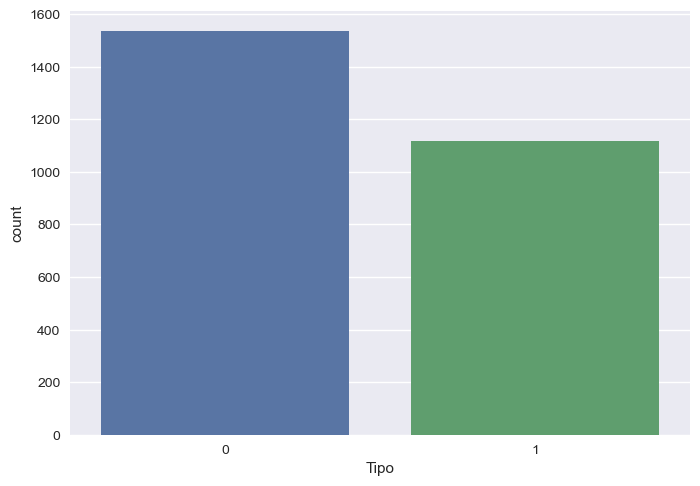

In [42]:
sns.countplot(x='Tipo', data=df)

In [43]:
df2 = df.copy()

([<matplotlib.patches.Wedge at 0x16d8389f220>,
 [Text(-0.26757429999679333, 1.0669601651332754, '1534'),
  Text(0.2918992363601378, -1.163956543781755, '1119')],
 [Text(-0.14594961818006907, 0.5819782718908775, '57.82%'),
  Text(0.1702745545434137, -0.678974650539357, '42.18%')])

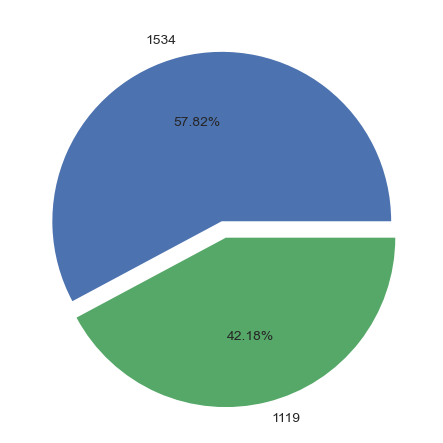

In [44]:
plt.pie(df2["Tipo"].value_counts(), labels = df.value_counts("Tipo"), autopct = "%.2f%%", explode= (0, 0.1))

In [45]:
# Contagem de grupos
df.groupby(by=['Tipo'])['Tipo'].count()

Tipo
0    1534
1    1119
Name: Tipo, dtype: int64

In [46]:
df.Tipo.value_counts(ascending=True)

1    1119
0    1534
Name: Tipo, dtype: int64

In [47]:
# df = df[np.isfinite(df).all(1)]

In [48]:
np.isnan(df).any()

Flow Duration      False
Tot Fwd Pkts       False
Tot Bwd Pkts       False
TotLen Fwd Pkts    False
TotLen Bwd Pkts    False
                   ...  
Idle Mean          False
Idle Std           False
Idle Max           False
Idle Min           False
Tipo               False
Length: 77, dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

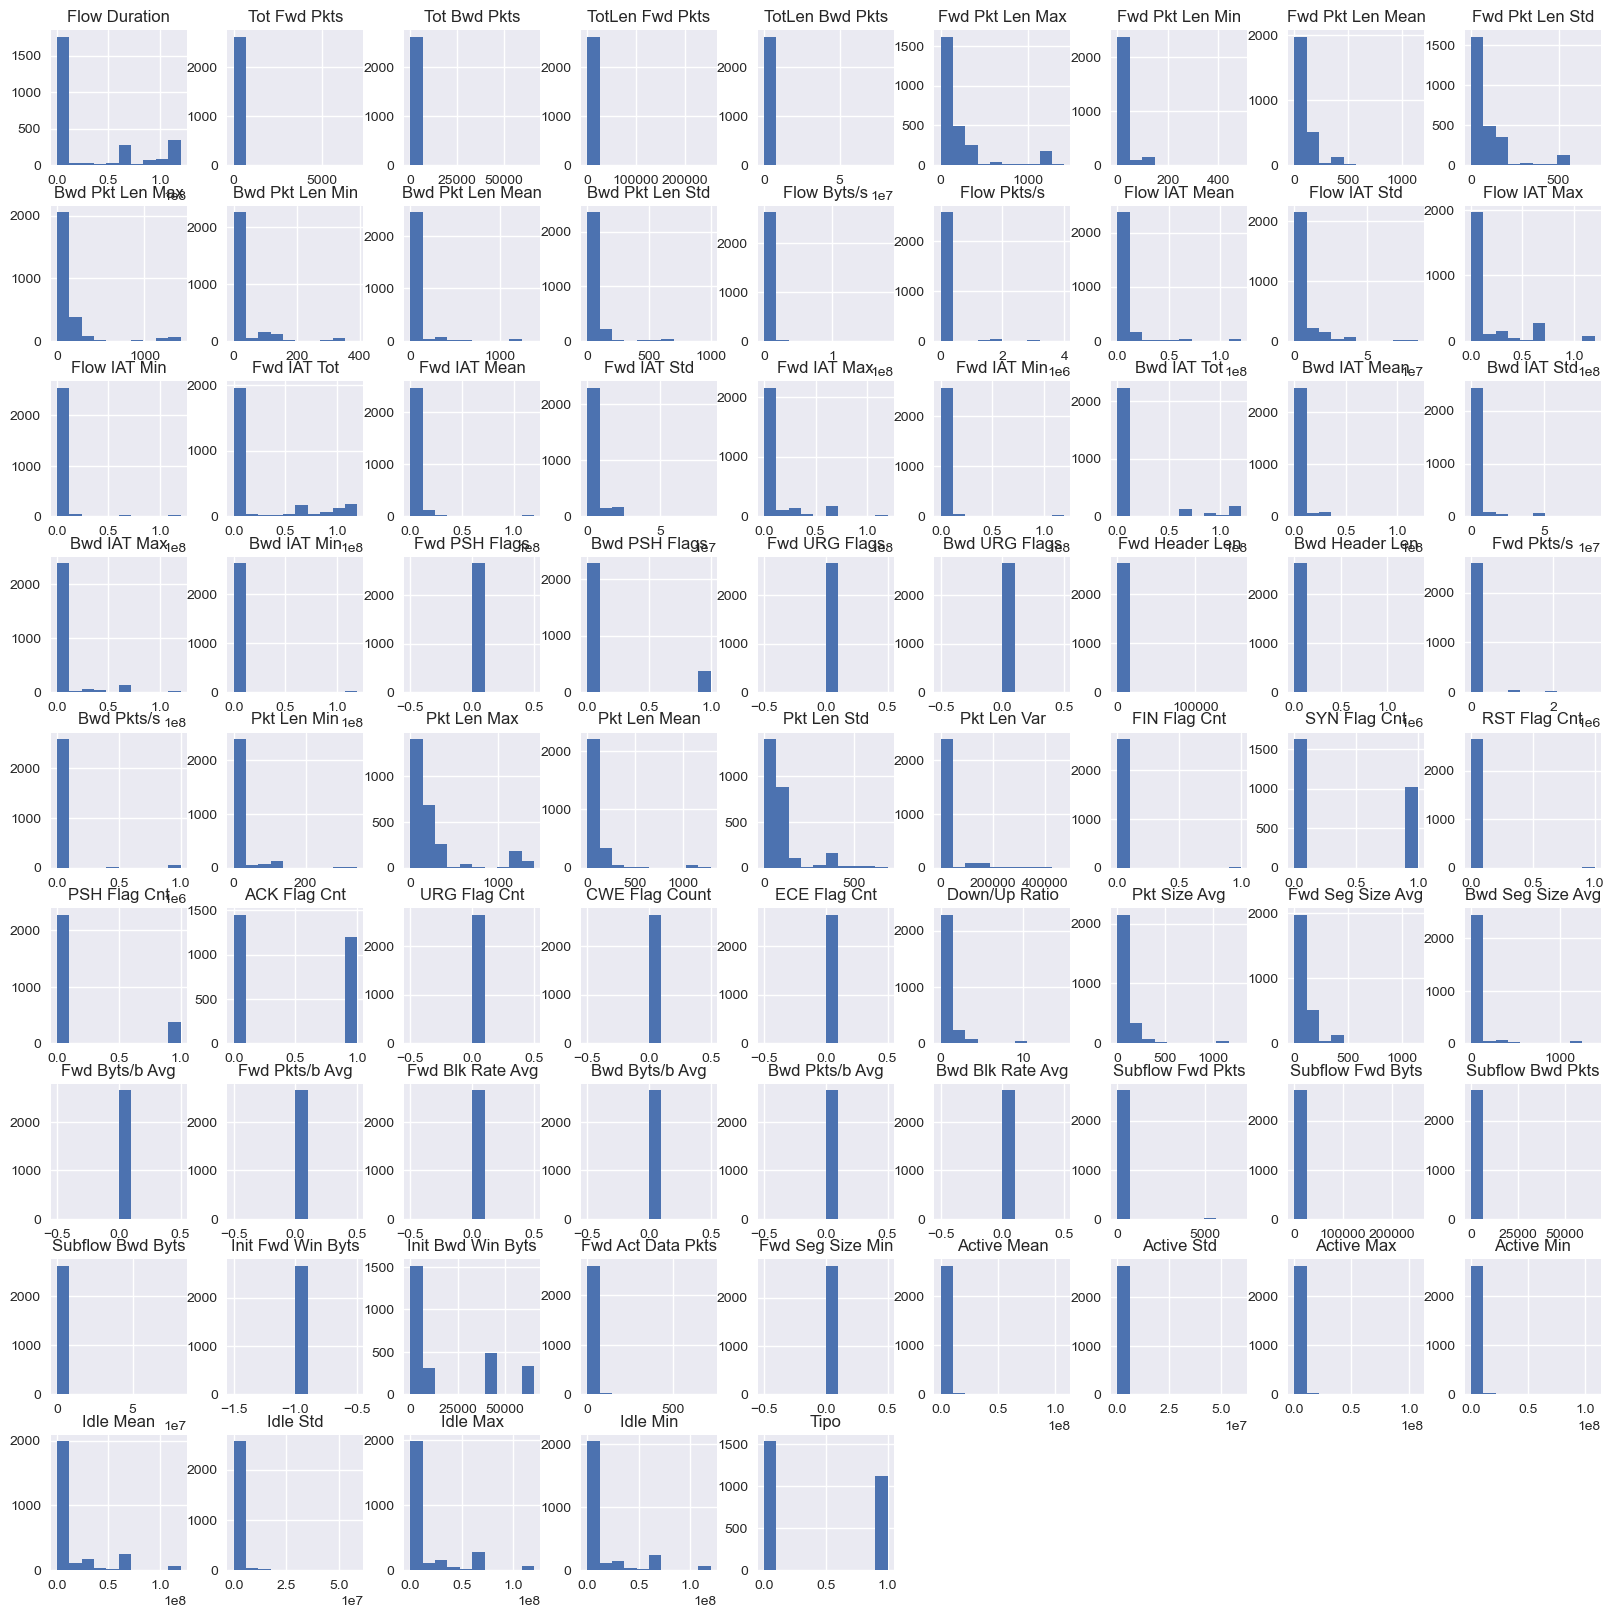

In [49]:
# Verificando distribuição dos dados
df.hist(figsize = (20,20))
plt.show

<p style='text-align: justify;'>Conforme se pode observar, vemos que há valores anormais que precisam serem estabelecidos na <strong>mesma escala ou grandeza nos atributos de variavel contínua:</strong><br></p>

## Pré-Processamento de Dados - Padronização

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      2653 non-null   int64  
 1   Tot Fwd Pkts       2653 non-null   int64  
 2   Tot Bwd Pkts       2653 non-null   int64  
 3   TotLen Fwd Pkts    2653 non-null   float64
 4   TotLen Bwd Pkts    2653 non-null   float64
 5   Fwd Pkt Len Max    2653 non-null   float64
 6   Fwd Pkt Len Min    2653 non-null   float64
 7   Fwd Pkt Len Mean   2653 non-null   float64
 8   Fwd Pkt Len Std    2653 non-null   float64
 9   Bwd Pkt Len Max    2653 non-null   float64
 10  Bwd Pkt Len Min    2653 non-null   float64
 11  Bwd Pkt Len Mean   2653 non-null   float64
 12  Bwd Pkt Len Std    2653 non-null   float64
 13  Flow Byts/s        2653 non-null   float64
 14  Flow Pkts/s        2653 non-null   float64
 15  Flow IAT Mean      2653 non-null   float64
 16  Flow IAT Std       2653 

In [51]:
list(df.columns.values)

['Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk

In [52]:
rob_scaler = RobustScaler()
df['sd_Flow Duration'] = rob_scaler.fit_transform(df['Flow Duration'].values.reshape(-1,1))
df['sd_Tot Fwd Pkts'] = rob_scaler.fit_transform(df['Tot Fwd Pkts'].values.reshape(-1,1))
df['sd_Tot Bwd Pkts'] = rob_scaler.fit_transform(df['Tot Bwd Pkts'].values.reshape(-1,1))
df['sd_TotLen Fwd Pkts'] = rob_scaler.fit_transform(df['TotLen Fwd Pkts'].values.reshape(-1,1))
df['sd_TotLen Bwd Pkts'] = rob_scaler.fit_transform(df['TotLen Bwd Pkts'].values.reshape(-1,1))
df['sd_Fwd Pkt Len Max'] = rob_scaler.fit_transform(df['Fwd Pkt Len Max'].values.reshape(-1,1))
df['sd_Fwd Pkt Len Min'] = rob_scaler.fit_transform(df['Fwd Pkt Len Min'].values.reshape(-1,1))
df['sd_Fwd Pkt Len Mean'] = rob_scaler.fit_transform(df['Fwd Pkt Len Mean'].values.reshape(-1,1))
df['sd_Fwd Pkt Len Std'] = rob_scaler.fit_transform(df['Fwd Pkt Len Std'].values.reshape(-1,1))
df['sd_Bwd Pkt Len Max'] = rob_scaler.fit_transform(df['Bwd Pkt Len Max'].values.reshape(-1,1))
df['sd_Bwd Pkt Len Min'] = rob_scaler.fit_transform(df['Bwd Pkt Len Min'].values.reshape(-1,1))
df['sd_Bwd Pkt Len Mean'] = rob_scaler.fit_transform(df['Bwd Pkt Len Mean'].values.reshape(-1,1))
df['sd_Bwd Pkt Len Std'] = rob_scaler.fit_transform(df['Bwd Pkt Len Std'].values.reshape(-1,1))
df['sd_Flow Byts/s'] = rob_scaler.fit_transform(df['Flow Byts/s'].values.reshape(-1,1))
df['sd_Flow Pkts/s'] = rob_scaler.fit_transform(df['Flow Pkts/s'].values.reshape(-1,1))
df['sd_Flow IAT Mean'] = rob_scaler.fit_transform(df['Flow IAT Mean'].values.reshape(-1,1))
df['sd_Flow IAT Std'] = rob_scaler.fit_transform(df['Flow IAT Std'].values.reshape(-1,1))
df['sd_Flow IAT Max'] = rob_scaler.fit_transform(df['Flow IAT Max'].values.reshape(-1,1))
df['sd_Flow IAT Min'] = rob_scaler.fit_transform(df['Flow IAT Min'].values.reshape(-1,1))
df['sd_Fwd IAT Tot'] = rob_scaler.fit_transform(df['Fwd IAT Tot'].values.reshape(-1,1))
df['sd_Fwd IAT Mean'] = rob_scaler.fit_transform(df['Fwd IAT Mean'].values.reshape(-1,1))
df['sd_Bwd IAT Max'] = rob_scaler.fit_transform(df['Bwd IAT Max'].values.reshape(-1,1))
df['sd_Fwd IAT Std'] = rob_scaler.fit_transform(df['Fwd IAT Std'].values.reshape(-1,1))
df['sd_Fwd IAT Max'] = rob_scaler.fit_transform(df['Fwd IAT Max'].values.reshape(-1,1))
df['sd_Fwd IAT Min'] = rob_scaler.fit_transform(df['Fwd IAT Min'].values.reshape(-1,1))
df['sd_Bwd IAT Tot'] = rob_scaler.fit_transform(df['Bwd IAT Tot'].values.reshape(-1,1))
df['sd_Bwd IAT Mean'] = rob_scaler.fit_transform(df['Bwd IAT Mean'].values.reshape(-1,1))
df['sd_Bwd IAT Std'] = rob_scaler.fit_transform(df['Bwd IAT Std'].values.reshape(-1,1))
df['sd_Bwd IAT Min'] = rob_scaler.fit_transform(df['Bwd IAT Min'].values.reshape(-1,1))
df['sd_Fwd PSH Flags'] = rob_scaler.fit_transform(df['Fwd PSH Flags'].values.reshape(-1,1))
df['sd_Bwd PSH Flags'] = rob_scaler.fit_transform(df['Bwd PSH Flags'].values.reshape(-1,1))
df['sd_Fwd URG Flags'] = rob_scaler.fit_transform(df['Fwd URG Flags'].values.reshape(-1,1))
df['sd_Bwd URG Flags'] = rob_scaler.fit_transform(df['Bwd URG Flags'].values.reshape(-1,1))
df['sd_Fwd Header Len'] = rob_scaler.fit_transform(df['Fwd Header Len'].values.reshape(-1,1))
df['sd_Bwd Header Len'] = rob_scaler.fit_transform(df['Bwd Header Len'].values.reshape(-1,1))
df['sd_Fwd Pkts/s'] = rob_scaler.fit_transform(df['Fwd Pkts/s'].values.reshape(-1,1))
df['sd_Bwd Pkts/s'] = rob_scaler.fit_transform(df['Bwd Pkts/s'].values.reshape(-1,1))
df['sd_Pkt Len Min'] = rob_scaler.fit_transform(df['Pkt Len Min'].values.reshape(-1,1))
df['sd_Pkt Len Max'] = rob_scaler.fit_transform(df['Pkt Len Max'].values.reshape(-1,1))
df['sd_Pkt Len Mean'] = rob_scaler.fit_transform(df['Pkt Len Mean'].values.reshape(-1,1))
df['sd_Pkt Len Std'] = rob_scaler.fit_transform(df['Pkt Len Std'].values.reshape(-1,1))
df['sd_Pkt Len Var'] = rob_scaler.fit_transform(df['Pkt Len Var'].values.reshape(-1,1))
df['sd_FIN Flag Cnt'] = rob_scaler.fit_transform(df['FIN Flag Cnt'].values.reshape(-1,1))
df['sd_SYN Flag Cnt'] = rob_scaler.fit_transform(df['SYN Flag Cnt'].values.reshape(-1,1))
df['sd_RST Flag Cnt'] = rob_scaler.fit_transform(df['RST Flag Cnt'].values.reshape(-1,1))
df['sd_PSH Flag Cnt'] = rob_scaler.fit_transform(df['PSH Flag Cnt'].values.reshape(-1,1))
df['sd_ACK Flag Cnt'] = rob_scaler.fit_transform(df['ACK Flag Cnt'].values.reshape(-1,1))
df['sd_URG Flag Cnt'] = rob_scaler.fit_transform(df['URG Flag Cnt'].values.reshape(-1,1))
df['sd_CWE Flag Count'] = rob_scaler.fit_transform(df['CWE Flag Count'].values.reshape(-1,1))
df['sd_ECE Flag Cnt'] = rob_scaler.fit_transform(df['ECE Flag Cnt'].values.reshape(-1,1))
df['sd_Down/Up Ratio'] = rob_scaler.fit_transform(df['Down/Up Ratio'].values.reshape(-1,1))
df['sd_Pkt Size Avg'] = rob_scaler.fit_transform(df['Pkt Size Avg'].values.reshape(-1,1))
df['sd_Fwd Seg Size Avg'] = rob_scaler.fit_transform(df['Fwd Seg Size Avg'].values.reshape(-1,1))
df['sd_Bwd Seg Size Avg'] = rob_scaler.fit_transform(df['Bwd Seg Size Avg'].values.reshape(-1,1))
df['sd_Fwd Byts/b Avg'] = rob_scaler.fit_transform(df['Fwd Byts/b Avg'].values.reshape(-1,1))
df['sd_Fwd Pkts/b Avg'] = rob_scaler.fit_transform(df['Fwd Pkts/b Avg'].values.reshape(-1,1))
df['sd_Fwd Blk Rate Avg'] = rob_scaler.fit_transform(df['Fwd Blk Rate Avg'].values.reshape(-1,1))
df['sd_Bwd Byts/b Avg'] = rob_scaler.fit_transform(df['Bwd Byts/b Avg'].values.reshape(-1,1))
df['sd_Bwd Pkts/b Avg'] = rob_scaler.fit_transform(df['Bwd Pkts/b Avg'].values.reshape(-1,1))
df['sd_Bwd Blk Rate Avg'] = rob_scaler.fit_transform(df['Bwd Blk Rate Avg'].values.reshape(-1,1))
df['sd_Subflow Fwd Pkts'] = rob_scaler.fit_transform(df['Subflow Fwd Pkts'].values.reshape(-1,1))
df['sd_Subflow Fwd Byts'] = rob_scaler.fit_transform(df['Subflow Fwd Byts'].values.reshape(-1,1))
df['sd_Subflow Bwd Pkts'] = rob_scaler.fit_transform(df['Subflow Bwd Pkts'].values.reshape(-1,1))
df['sd_Subflow Bwd Byts'] = rob_scaler.fit_transform(df['Subflow Bwd Byts'].values.reshape(-1,1))
df['sd_Init Fwd Win Byts'] = rob_scaler.fit_transform(df['Init Fwd Win Byts'].values.reshape(-1,1))
df['sd_Init Bwd Win Byts'] = rob_scaler.fit_transform(df['Init Bwd Win Byts'].values.reshape(-1,1))
df['sd_Fwd Act Data Pkts'] = rob_scaler.fit_transform(df['Fwd Act Data Pkts'].values.reshape(-1,1))
df['sd_Fwd Seg Size Min'] = rob_scaler.fit_transform(df['Fwd Seg Size Min'].values.reshape(-1,1))
df['sd_Active Mean'] = rob_scaler.fit_transform(df['Active Mean'].values.reshape(-1,1))
df['sd_Active Std'] = rob_scaler.fit_transform(df['Active Std'].values.reshape(-1,1))
df['sd_Active Max'] = rob_scaler.fit_transform(df['Active Max'].values.reshape(-1,1))
df['sd_Active Min'] = rob_scaler.fit_transform(df['Active Min'].values.reshape(-1,1))
df['sd_Idle Mean'] = rob_scaler.fit_transform(df['Idle Mean'].values.reshape(-1,1))
df['sd_Idle Std'] = rob_scaler.fit_transform(df['Idle Std'].values.reshape(-1,1))
df['sd_Idle Max'] = rob_scaler.fit_transform(df['Idle Max'].values.reshape(-1,1))
df['sd_Idle Min'] = rob_scaler.fit_transform(df['Idle Min'].values.reshape(-1,1))

df.drop(['Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min',
         'Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std',
         'Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean',
         'Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Max','Bwd IAT Std','Bwd IAT Min','Fwd PSH Flags',
         'Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min',
         'Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt',
         'ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg',
         'Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg',
         'Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts',
         'Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std',
         'Idle Max','Idle Min'], axis=1, inplace=True)

sd_Flow_Duration = df['sd_Flow Duration']
sd_Tot_Fwd_Pkts = df['sd_Tot Fwd Pkts']
sd_Tot_Bwd_Pkts = df['sd_Tot Bwd Pkts']
sd_TotLen_Fwd_Pkts = df['sd_TotLen Fwd Pkts']
sd_TotLen_Bwd_Pkts = df['sd_TotLen Bwd Pkts']
sd_Fwd_Pkt_Len_Max = df['sd_Fwd Pkt Len Max']
sd_Fwd_Pkt_Len_Min = df['sd_Fwd Pkt Len Min']
sd_Fwd_Pkt_Len_Mean = df['sd_Fwd Pkt Len Mean']
sd_Fwd_Pkt_Len_Std = df['sd_Fwd Pkt Len Std']
sd_Bwd_Pkt_Len_Max = df['sd_Bwd Pkt Len Max']
sd_Bwd_Pkt_Len_Min = df['sd_Bwd Pkt Len Min']
sd_Bwd_Pkt_Len_Mean = df['sd_Bwd Pkt Len Mean']
sd_Bwd_Pkt_Len_Std = df['sd_Bwd Pkt Len Std']
sd_Flow_Byts_s = df['sd_Flow Byts/s']
sd_Flow_Pkts_s = df['sd_Flow Pkts/s']
sd_Flow_IAT_Mean = df['sd_Flow IAT Mean']
sd_Flow_IAT_Std = df['sd_Flow IAT Std']
sd_Flow_IAT_Max = df['sd_Flow IAT Max']
sd_Flow_IAT_Min = df['sd_Flow IAT Min']
sd_Fwd_IAT_Tot = df['sd_Fwd IAT Tot']
sd_Fwd_IAT_Mean = df['sd_Fwd IAT Mean']
sd_Fwd_IAT_Std = df['sd_Fwd IAT Std']
sd_Fwd_IAT_Max = df['sd_Fwd IAT Max']
sd_Fwd_IAT_Min = df['sd_Fwd IAT Min']
sd_Bwd_IAT_Tot = df['sd_Bwd IAT Tot']
sd_Bwd_IAT_Mean = df['sd_Bwd IAT Mean']
sd_Bwd_IAT_Std = df['sd_Bwd IAT Std']
sd_Bwd_IAT_Max = df['sd_Bwd IAT Max']
sd_Bwd_IAT_Min = df['sd_Bwd IAT Min']
sd_Fwd_PSH_Flags = df['sd_Fwd PSH Flags']
sd_Bwd_PSH_Flags = df['sd_Bwd PSH Flags']
sd_Fwd_URG_Flags = df['sd_Fwd URG Flags']
sd_Bwd_URG_Flags = df['sd_Bwd URG Flags']
sd_Fwd_Header_Len = df['sd_Fwd Header Len']
sd_Bwd_Header_Len = df['sd_Bwd Header Len']
sd_Fwd_Pkts_s = df['sd_Fwd Pkts/s']
sd_Bwd_Pkts_s = df['sd_Bwd Pkts/s']
sd_Pkt_Len_Min = df['sd_Pkt Len Min']
sd_Pkt_Len_Max = df['sd_Pkt Len Max']
sd_Pkt_Len_Mean = df['sd_Pkt Len Mean']
sd_Pkt_Len_Std = df['sd_Pkt Len Std']
sd_Pkt_Len_Var = df['sd_Pkt Len Var']
sd_FIN_Flag_Cnt = df['sd_FIN Flag Cnt']
sd_SYN_Flag_Cnt = df['sd_SYN Flag Cnt']
sd_RST_Flag_Cnt = df['sd_RST Flag Cnt']
sd_PSH_Flag_Cnt = df['sd_PSH Flag Cnt']
sd_ACK_Flag_Cnt = df['sd_ACK Flag Cnt']
sd_URG_Flag_Cnt = df['sd_URG Flag Cnt']
sd_CWE_Flag_Count = df['sd_CWE Flag Count']
sd_ECE_Flag_Cnt = df['sd_ECE Flag Cnt']
sd_Down_Up_Ratio = df['sd_Down/Up Ratio']
sd_Pkt_Size_Avg = df['sd_Pkt Size Avg']
sd_Fwd_Seg_Size_Avg = df['sd_Fwd Seg Size Avg']
sd_Bwd_Seg_Size_Avg = df['sd_Bwd Seg Size Avg']
sd_Fwd_Byts_b_Avg = df['sd_Fwd Byts/b Avg']
sd_Fwd_Pkts_b_Avg = df['sd_Fwd Pkts/b Avg']
sd_Fwd_Blk_Rate_Avg = df['sd_Fwd Blk Rate Avg']
sd_Bwd_Byts_b_Avg = df['sd_Bwd Byts/b Avg']
sd_Bwd_Pkts_b_Avg = df['sd_Bwd Pkts/b Avg']
sd_Bwd_Blk_Rate_Avg = df['sd_Bwd Blk Rate Avg']
sd_Subflow_Fwd_Pkts = df['sd_Subflow Fwd Pkts']
sd_Subflow_Fwd_Byts = df['sd_Subflow Fwd Byts']
sd_Subflow_Bwd_Pkts = df['sd_Subflow Bwd Pkts']
sd_Subflow_Bwd_Byts = df['sd_Subflow Bwd Byts']
sd_Init_Fwd_Win_Byts = df['sd_Init Fwd Win Byts']
sd_Init_Bwd_Win_Byts = df['sd_Init Bwd Win Byts']
sd_Fwd_Act_Data_Pkts = df['sd_Fwd Act Data Pkts']
sd_Fwd_Seg_Size_Min = df['sd_Fwd Seg Size Min']
sd_Active_Mean = df['sd_Active Mean']
sd_Active_Std = df['sd_Active Std']
sd_Active_Max = df['sd_Active Max']
sd_Active_Min = df['sd_Active Min']
sd_Idle_Mean = df['sd_Idle Mean']
sd_Idle_Std = df['sd_Idle Std']
sd_Idle_Max = df['sd_Idle Max']
sd_Idle_Min = df['sd_Idle Min']

df.drop(['sd_Flow Duration', 'sd_Tot Fwd Pkts','sd_Tot Bwd Pkts','sd_TotLen Fwd Pkts','sd_TotLen Bwd Pkts',
         'sd_Fwd Pkt Len Max','sd_Fwd Pkt Len Min','sd_Fwd Pkt Len Mean','sd_Fwd Pkt Len Std','sd_Bwd Pkt Len Max',
         'sd_Bwd Pkt Len Min','sd_Bwd Pkt Len Mean','sd_Bwd Pkt Len Std','sd_Flow Byts/s','sd_Flow Pkts/s',
         'sd_Flow IAT Mean','sd_Flow IAT Std','sd_Flow IAT Max','sd_Flow IAT Min','sd_Fwd IAT Tot','sd_Fwd IAT Mean',
         'sd_Bwd IAT Max','sd_Fwd IAT Std','sd_Fwd IAT Max','sd_Fwd IAT Min','sd_Bwd IAT Tot','sd_Bwd IAT Mean',
         'sd_Bwd IAT Std','sd_Bwd IAT Min','sd_Fwd PSH Flags','sd_Bwd PSH Flags','sd_Fwd URG Flags','sd_Bwd URG Flags',
         'sd_Fwd Header Len','sd_Bwd Header Len','sd_Fwd Pkts/s','sd_Bwd Pkts/s','sd_Pkt Len Min','sd_Pkt Len Max',
         'sd_Pkt Len Mean','sd_Pkt Len Std','sd_Pkt Len Var','sd_FIN Flag Cnt','sd_SYN Flag Cnt','sd_RST Flag Cnt',
         'sd_PSH Flag Cnt','sd_ACK Flag Cnt','sd_URG Flag Cnt','sd_CWE Flag Count','sd_ECE Flag Cnt','sd_Down/Up Ratio',
         'sd_Pkt Size Avg','sd_Fwd Seg Size Avg','sd_Bwd Seg Size Avg','sd_Fwd Byts/b Avg','sd_Fwd Pkts/b Avg',
         'sd_Fwd Blk Rate Avg','sd_Bwd Byts/b Avg','sd_Bwd Pkts/b Avg','sd_Bwd Blk Rate Avg','sd_Subflow Fwd Pkts',
         'sd_Subflow Fwd Byts','sd_Subflow Bwd Pkts','sd_Subflow Bwd Byts','sd_Init Fwd Win Byts','sd_Init Bwd Win Byts',
         'sd_Fwd Act Data Pkts','sd_Fwd Seg Size Min','sd_Active Mean','sd_Active Std','sd_Active Max','sd_Active Min',
         'sd_Idle Mean','sd_Idle Std','sd_Idle Max','sd_Idle Min'], axis=1, inplace=True)


df.insert(0, 'sd_Flow Duration', sd_Flow_Duration)
df.insert(1, 'sd_Tot Fwd Pkts', sd_Tot_Fwd_Pkts)
df.insert(2, 'sd_Tot Bwd Pkts', sd_Tot_Bwd_Pkts)
df.insert(3, 'sd_TotLen Fwd Pkts', sd_TotLen_Fwd_Pkts)
df.insert(4, 'sd_TotLen Bwd Pkts', sd_TotLen_Bwd_Pkts)
df.insert(5, 'sd_Fwd Pkt Len Max', sd_Fwd_Pkt_Len_Max)
df.insert(6, 'sd_Fwd Pkt Len Min', sd_Fwd_Pkt_Len_Min)
df.insert(7, 'sd_Fwd Pkt Len Mean', sd_Fwd_Pkt_Len_Mean)
df.insert(8, 'sd_Fwd Pkt Len Std', sd_Fwd_Pkt_Len_Std)
df.insert(9, 'sd_Bwd Pkt Len Max', sd_Bwd_Pkt_Len_Max)
df.insert(10, 'sd_Bwd Pkt Len Min', sd_Bwd_Pkt_Len_Min)
df.insert(11, 'sd_Bwd Pkt Len Mean', sd_Bwd_Pkt_Len_Mean)
df.insert(12, 'sd_Bwd Pkt Len Std', sd_Bwd_Pkt_Len_Std)
df.insert(13, 'sd_Flow Byts/s', sd_Flow_Byts_s)
df.insert(14, 'sd_Flow Pkts/s', sd_Flow_Pkts_s)
df.insert(15, 'sd_Flow IAT Mean', sd_Flow_IAT_Mean)
df.insert(16, 'sd_Flow IAT Std', sd_Flow_IAT_Std)
df.insert(17, 'sd_Flow IAT Max', sd_Flow_IAT_Max)
df.insert(18, 'sd_Flow IAT Min', sd_Flow_IAT_Min)
df.insert(19, 'sd_Fwd IAT Tot', sd_Fwd_IAT_Tot)
df.insert(20, 'sd_Fwd IAT Mean', sd_Fwd_IAT_Mean)
df.insert(21, 'sd_Fwd IAT Std', sd_Fwd_IAT_Std)
df.insert(22, 'sd_Fwd IAT Max', sd_Fwd_IAT_Max)
df.insert(23, 'sd_Fwd IAT Min', sd_Fwd_IAT_Min)
df.insert(24, 'sd_Bwd IAT Tot', sd_Bwd_IAT_Tot)
df.insert(25, 'sd_Bwd IAT Mean', sd_Bwd_IAT_Mean)
df.insert(26, 'sd_Bwd IAT Max', sd_Bwd_IAT_Max)
df.insert(27, 'sd_Bwd IAT Std', sd_Bwd_IAT_Std)
df.insert(28, 'sd_Bwd IAT Min', sd_Bwd_IAT_Min)
df.insert(29, 'sd_Fwd PSH Flags', sd_Fwd_PSH_Flags)
df.insert(30, 'sd_Bwd PSH Flags', sd_Bwd_PSH_Flags)
df.insert(31, 'sd_Fwd URG Flags', sd_Fwd_URG_Flags)
df.insert(32, 'sd_Bwd URG Flags', sd_Bwd_URG_Flags)
df.insert(33, 'sd_Fwd Header Len', sd_Fwd_Header_Len)
df.insert(34, 'sd_Bwd Header Len', sd_Bwd_Header_Len)
df.insert(35, 'sd_Fwd Pkts/s', sd_Fwd_Pkts_s)
df.insert(36, 'sd_Bwd Pkts/s', sd_Bwd_Pkts_s)
df.insert(37, 'sd_Pkt Len Min', sd_Pkt_Len_Min)
df.insert(38, 'sd_Pkt Len Max', sd_Pkt_Len_Max)
df.insert(39, 'sd_Pkt Len Mean', sd_Pkt_Len_Mean)
df.insert(40, 'sd_Pkt Len Std', sd_Pkt_Len_Std)
df.insert(41, 'sd_Pkt Len Var', sd_Pkt_Len_Var)
df.insert(42, 'sd_FIN Flag Cnt', sd_FIN_Flag_Cnt)
df.insert(43, 'sd_SYN Flag Cnt', sd_SYN_Flag_Cnt)
df.insert(44, 'sd_RST Flag Cnt', sd_RST_Flag_Cnt)
df.insert(45, 'sd_PSH Flag Cnt ', sd_PSH_Flag_Cnt)
df.insert(46, 'sd_ACK Flag Cnt', sd_ACK_Flag_Cnt)
df.insert(47, 'sd_URG Flag Cnt', sd_URG_Flag_Cnt)
df.insert(48, 'sd_CWE Flag Count', sd_CWE_Flag_Count)
df.insert(49, 'sd_ECE Flag Cnt', sd_ECE_Flag_Cnt)
df.insert(50, 'sd_Down/Up Ratio', sd_Down_Up_Ratio)
df.insert(51, 'sd_Pkt Size Avg', sd_Pkt_Size_Avg)
df.insert(52, 'sd_Fwd Seg Size Avg', sd_Fwd_Seg_Size_Avg)
df.insert(53, 'sd_Bwd Seg Size Avg', sd_Bwd_Seg_Size_Avg)
df.insert(54, 'sd_Fwd Byts/b Avg', sd_Fwd_Byts_b_Avg)
df.insert(55, 'sd_Fwd Pkts/b Avg', sd_Fwd_Pkts_b_Avg)
df.insert(56, 'sd_Fwd Blk Rate Avg', sd_Fwd_Blk_Rate_Avg)
df.insert(57, 'sd_Bwd Byts/b Avg', sd_Bwd_Byts_b_Avg)
df.insert(58, 'sd_Bwd Pkts/b Avg', sd_Bwd_Pkts_b_Avg)
df.insert(59, 'sd_Bwd Blk Rate Avg', sd_Bwd_Blk_Rate_Avg)
df.insert(60, 'sd_Subflow Fwd Pkts', sd_Subflow_Fwd_Pkts)
df.insert(61, 'sd_Subflow Fwd Byts', sd_Subflow_Fwd_Byts)
df.insert(62, 'sd_Subflow Bwd Pkts', sd_Subflow_Bwd_Pkts)
df.insert(63, 'sd_Subflow Bwd Byts', sd_Subflow_Bwd_Byts)
df.insert(64, 'sd_Init Fwd Win Byts', sd_Init_Fwd_Win_Byts)
df.insert(65, 'sd_Init Bwd Win Byts', sd_Init_Bwd_Win_Byts)
df.insert(66, 'sd_Fwd Act Data Pkts',sd_Fwd_Act_Data_Pkts)
df.insert(67, 'sd_Fwd Seg Size Min', sd_Fwd_Seg_Size_Min)
df.insert(68, 'sd_Active Mean', sd_Active_Mean)
df.insert(69, 'sd_Active Std ', sd_Active_Std)
df.insert(70, 'sd_Active Max', sd_Active_Max)
df.insert(71, 'sd_Active Min', sd_Active_Min)
df.insert(72, 'sd_Idle Mean', sd_Idle_Mean)
df.insert(73, 'sd_Idle Std', sd_Idle_Std)
df.insert(74, 'sd_Idle Max', sd_Idle_Max)
df.insert(75, 'sd_Idle Min', sd_Idle_Min)

df.head()

,sd_Flow Duration,sd_Tot Fwd Pkts,sd_Tot Bwd Pkts,sd_TotLen Fwd Pkts,sd_TotLen Bwd Pkts,sd_Fwd Pkt Len Max,sd_Fwd Pkt Len Min,sd_Fwd Pkt Len Mean,sd_Fwd Pkt Len Std,sd_Bwd Pkt Len Max,...,sd_Fwd Seg Size Min,sd_Active Mean,sd_Active Std,sd_Active Max,sd_Active Min,sd_Idle Mean,sd_Idle Std,sd_Idle Max,sd_Idle Min,Tipo
0,-0.005275,-0.75,0.0,-0.221978,-0.007576,-0.218341,0.0,-0.307692,-0.004110,-0.007576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.005272,-0.75,0.0,-0.221978,-0.007576,-0.218341,0.0,-0.307692,-0.004110,-0.007576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.006400,-0.50,-0.5,-0.221978,0.227273,-0.218341,0.0,-0.307692,-0.004110,0.227273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.006401,-0.25,-0.5,-0.153846,-0.007576,-0.082969,0.0,-0.175214,0.169954,-0.007576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.019925,3.00,5.5,25.329670,44.083333,5.947598,0.0,6.316809,4.789993,10.689394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [53]:
df

,sd_Flow Duration,sd_Tot Fwd Pkts,sd_Tot Bwd Pkts,sd_TotLen Fwd Pkts,sd_TotLen Bwd Pkts,sd_Fwd Pkt Len Max,sd_Fwd Pkt Len Min,sd_Fwd Pkt Len Mean,sd_Fwd Pkt Len Std,sd_Bwd Pkt Len Max,...,sd_Fwd Seg Size Min,sd_Active Mean,sd_Active Std,sd_Active Max,sd_Active Min,sd_Idle Mean,sd_Idle Std,sd_Idle Max,sd_Idle Min,Tipo
0,-0.005275,-0.75,0.0,-0.221978,-0.007576,-0.218341,0.0,-0.307692,-0.004110,-0.007576,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
1,-0.005272,-0.75,0.0,-0.221978,-0.007576,-0.218341,0.0,-0.307692,-0.004110,-0.007576,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
2,-0.006400,-0.50,-0.5,-0.221978,0.227273,-0.218341,0.0,-0.307692,-0.004110,0.227273,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
3,-0.006401,-0.25,-0.5,-0.153846,-0.007576,-0.082969,0.0,-0.175214,0.169954,-0.007576,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
4,0.019925,3.00,5.5,25.329670,44.083333,5.947598,0.0,6.316809,4.789993,10.689394,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,0.001551,-0.25,0.5,0.509890,1.939394,1.235808,0.0,1.115385,1.865674,1.939394,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
2649,0.997790,1.00,2.0,2.714286,0.174242,3.074236,0.0,1.323565,2.475216,0.174242,...,0.0,5.821212,573745.720236,18.719884,1.0,1.199213,447581.073281,1.036296,1.438323,0
2650,0.003769,0.25,0.0,0.509890,-0.007576,1.235808,0.0,0.403846,1.318027,-0.007576,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
2651,0.001701,0.00,0.5,0.509890,0.121212,1.235808,0.0,0.641026,1.522562,0.121212,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0


### Balanceamento da função alvo (rótulo) - Fraud

Tipo
0    1534
1    1119
dtype: int64

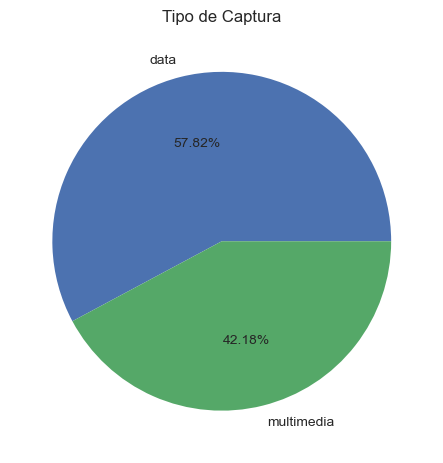

In [54]:
df.value_counts('Tipo').plot.pie(autopct = '%.2f%%', labels = ("data", "multimedia"), label = (''), title='Tipo de Captura')
df.value_counts('Tipo')

Tipo
0    1119
1    1119
dtype: int64

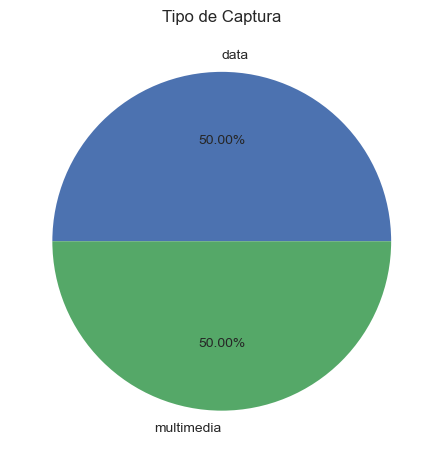

In [55]:
real = df[df["Tipo"] == 0]
tipo = df[df["Tipo"] == 1]

# Resampling the original dataset 
real_resample = real.sample(n = 1119, random_state = 100)
tipo_resample = tipo.sample(n = 1119, random_state = 100)

# Creating new dataset  
dfUnder = pd.concat([real_resample, tipo_resample], axis = 0)

dfUnder.value_counts("Tipo").plot.pie(autopct = '%.2f%%', labels = ("data", "multimedia"), label = (''), title='Tipo de Captura')
dfUnder.value_counts("Tipo")

In [56]:
dfUnder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238 entries, 2531 to 792
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sd_Flow Duration      2238 non-null   float64
 1   sd_Tot Fwd Pkts       2238 non-null   float64
 2   sd_Tot Bwd Pkts       2238 non-null   float64
 3   sd_TotLen Fwd Pkts    2238 non-null   float64
 4   sd_TotLen Bwd Pkts    2238 non-null   float64
 5   sd_Fwd Pkt Len Max    2238 non-null   float64
 6   sd_Fwd Pkt Len Min    2238 non-null   float64
 7   sd_Fwd Pkt Len Mean   2238 non-null   float64
 8   sd_Fwd Pkt Len Std    2238 non-null   float64
 9   sd_Bwd Pkt Len Max    2238 non-null   float64
 10  sd_Bwd Pkt Len Min    2238 non-null   float64
 11  sd_Bwd Pkt Len Mean   2238 non-null   float64
 12  sd_Bwd Pkt Len Std    2238 non-null   float64
 13  sd_Flow Byts/s        2238 non-null   float64
 14  sd_Flow Pkts/s        2238 non-null   float64
 15  sd_Flow IAT Mean   

In [57]:
# Oversampling
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# sns.countplot(x=y_train_smote) 

## Correlação de Pearson

<p style='text-align: justify;'>A correlação é o relacionamento entre 2 variáveis. O métodos mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houverem atributos altamente correlacionados (colineares).</p>

In [58]:
# Correlação de Pearson
correlacao = dfUnder.corr(method = 'pearson')
correlacao

,sd_Flow Duration,sd_Tot Fwd Pkts,sd_Tot Bwd Pkts,sd_TotLen Fwd Pkts,sd_TotLen Bwd Pkts,sd_Fwd Pkt Len Max,sd_Fwd Pkt Len Min,sd_Fwd Pkt Len Mean,sd_Fwd Pkt Len Std,sd_Bwd Pkt Len Max,...,sd_Fwd Seg Size Min,sd_Active Mean,sd_Active Std,sd_Active Max,sd_Active Min,sd_Idle Mean,sd_Idle Std,sd_Idle Max,sd_Idle Min,Tipo
sd_Flow Duration,1.000000,0.160686,0.150411,0.153156,0.150015,-0.091974,0.160690,-0.145087,-0.201200,0.101336,...,NaN,0.203752,0.124213,0.216256,0.169695,0.658879,0.266989,0.678283,0.632778,0.637095
sd_Tot Fwd Pkts,0.160686,1.000000,0.997653,0.996512,0.997650,0.291141,-0.032538,-0.033468,0.027561,0.384338,...,NaN,0.001253,0.003451,0.001909,-0.000145,-0.053088,-0.015207,-0.053812,-0.051770,-0.088503
sd_Tot Bwd Pkts,0.150411,0.997653,1.000000,0.996841,0.999999,0.289957,-0.034554,-0.032403,0.029079,0.380841,...,NaN,-0.018803,-0.006232,-0.017358,-0.018027,-0.054085,-0.017915,-0.055166,-0.052452,-0.096641
sd_TotLen Fwd Pkts,0.153156,0.996512,0.996841,1.000000,0.996811,0.327853,-0.025813,0.006647,0.062874,0.408828,...,NaN,-0.008136,-0.006042,-0.008758,-0.006222,-0.052171,-0.017214,-0.053010,-0.050611,-0.091748
sd_TotLen Bwd Pkts,0.150015,0.997650,0.999999,0.996811,1.000000,0.289695,-0.034376,-0.032529,0.028852,0.380700,...,NaN,-0.018713,-0.006181,-0.017291,-0.017953,-0.054071,-0.018038,-0.055169,-0.052425,-0.096839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sd_Idle Mean,0.658879,-0.053088,-0.054085,-0.052171,-0.054071,-0.106647,0.278965,-0.057467,-0.167211,0.008205,...,NaN,0.085894,0.001448,0.064190,0.094456,1.000000,0.116901,0.994636,0.994275,0.534865
sd_Idle Std,0.266989,-0.015207,-0.017915,-0.017214,-0.018038,-0.020495,-0.027900,-0.056953,-0.044298,-0.006973,...,NaN,0.059851,0.090779,0.089826,0.026496,0.116901,1.000000,0.214263,0.012927,0.169561
sd_Idle Max,0.678283,-0.053812,-0.055166,-0.053010,-0.055169,-0.105677,0.273388,-0.061210,-0.168655,0.007981,...,NaN,0.091518,0.011311,0.073798,0.096251,0.994636,0.214263,1.000000,0.978825,0.543721
sd_Idle Min,0.632778,-0.051770,-0.052452,-0.050611,-0.052425,-0.104339,0.284145,-0.051238,-0.162995,0.009115,...,NaN,0.079434,-0.009115,0.053792,0.091817,0.994275,0.012927,0.978825,1.000000,0.519614


In [59]:
# Matriz de Correlação Seaborn
# sns.heatmap(correlacao, annot = True, vmin=-1, vmax=1, cmap="coolwarm")

In [60]:
# Checagem das colunas
dfUnder.columns[:-1].values

array(['sd_Flow Duration', 'sd_Tot Fwd Pkts', 'sd_Tot Bwd Pkts',
       'sd_TotLen Fwd Pkts', 'sd_TotLen Bwd Pkts', 'sd_Fwd Pkt Len Max',
       'sd_Fwd Pkt Len Min', 'sd_Fwd Pkt Len Mean', 'sd_Fwd Pkt Len Std',
       'sd_Bwd Pkt Len Max', 'sd_Bwd Pkt Len Min', 'sd_Bwd Pkt Len Mean',
       'sd_Bwd Pkt Len Std', 'sd_Flow Byts/s', 'sd_Flow Pkts/s',
       'sd_Flow IAT Mean', 'sd_Flow IAT Std', 'sd_Flow IAT Max',
       'sd_Flow IAT Min', 'sd_Fwd IAT Tot', 'sd_Fwd IAT Mean',
       'sd_Fwd IAT Std', 'sd_Fwd IAT Max', 'sd_Fwd IAT Min',
       'sd_Bwd IAT Tot', 'sd_Bwd IAT Mean', 'sd_Bwd IAT Max',
       'sd_Bwd IAT Std', 'sd_Bwd IAT Min', 'sd_Fwd PSH Flags',
       'sd_Bwd PSH Flags', 'sd_Fwd URG Flags', 'sd_Bwd URG Flags',
       'sd_Fwd Header Len', 'sd_Bwd Header Len', 'sd_Fwd Pkts/s',
       'sd_Bwd Pkts/s', 'sd_Pkt Len Min', 'sd_Pkt Len Max',
       'sd_Pkt Len Mean', 'sd_Pkt Len Std', 'sd_Pkt Len Var',
       'sd_FIN Flag Cnt', 'sd_SYN Flag Cnt', 'sd_RST Flag Cnt',
       'sd_PSH F

In [61]:
dfUnder.describe()

,sd_Flow Duration,sd_Tot Fwd Pkts,sd_Tot Bwd Pkts,sd_TotLen Fwd Pkts,sd_TotLen Bwd Pkts,sd_Fwd Pkt Len Max,sd_Fwd Pkt Len Min,sd_Fwd Pkt Len Mean,sd_Fwd Pkt Len Std,sd_Bwd Pkt Len Max,...,sd_Fwd Seg Size Min,sd_Active Mean,sd_Active Std,sd_Active Max,sd_Active Min,sd_Idle Mean,sd_Idle Std,sd_Idle Max,sd_Idle Min,Tipo
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,...,2238.0,2238.000000,2.238000e+03,2238.000000,2238.000000,2238.000000,2.238000e+03,2238.000000,2238.000000,2238.000000
mean,0.539252,11.777480,211.322163,4.355700,3958.023787,0.634612,14.215371,0.302723,0.602814,0.938141,...,0.0,10.890315,1.525431e+05,13.524293,3779.893106,1.241077,6.637247e+05,1.083878,1.486163,0.500000
std,0.741910,110.312066,2154.190808,36.301375,40456.836026,1.434220,40.465619,0.866185,1.019130,2.173288,...,0.0,55.946214,2.142037e+06,74.377489,20596.830153,2.225888,3.598581e+06,1.905830,2.748267,0.500112
min,-0.006401,-0.750000,-0.500000,-0.221978,-0.007576,-0.218341,0.000000,-0.307692,-0.004110,-0.007576,...,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,-0.002586,-0.500000,-0.500000,-0.221978,-0.007576,-0.218341,0.000000,-0.307692,-0.004110,-0.007576,...,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.001312,0.000000,0.000000,-0.151648,0.000000,-0.082969,0.000000,-0.051282,-0.000475,0.000000,...,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.500000
75%,1.060600,1.000000,0.500000,0.810989,1.007576,0.772926,0.000000,0.679487,0.959715,0.992424,...,0.0,1.213114,0.000000e+00,1.370250,448.810127,1.609569,0.000000e+00,1.537144,1.937156,1.000000
max,1.964748,1598.500000,32756.000000,533.751648,615226.234848,5.947598,344.000000,6.735043,5.600305,10.689394,...,0.0,1672.819442,5.966367e+07,1667.657776,682990.297468,9.652807,5.879183e+07,8.130322,11.997715,1.000000


# Selecionando dados

In [62]:
dfUnder

,sd_Flow Duration,sd_Tot Fwd Pkts,sd_Tot Bwd Pkts,sd_TotLen Fwd Pkts,sd_TotLen Bwd Pkts,sd_Fwd Pkt Len Max,sd_Fwd Pkt Len Min,sd_Fwd Pkt Len Mean,sd_Fwd Pkt Len Std,sd_Bwd Pkt Len Max,...,sd_Fwd Seg Size Min,sd_Active Mean,sd_Active Std,sd_Active Max,sd_Active Min,sd_Idle Mean,sd_Idle Std,sd_Idle Max,sd_Idle Min,Tipo
2531,-0.000090,0.00,0.0,0.167033,-0.007576,0.554585,0.0,0.196581,0.807365,-0.007576,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2650,0.003769,0.25,0.0,0.509890,-0.007576,1.235808,0.0,0.403846,1.318027,-0.007576,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2533,-0.000120,0.00,0.0,0.734066,-0.007576,0.772926,0.0,0.931624,0.995890,-0.007576,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1634,-0.000936,0.25,1.5,0.509890,2.068182,1.235808,0.0,0.403846,1.318027,1.939394,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1473,0.002604,0.50,1.0,4.254945,0.030303,5.196507,0.0,3.174359,4.102943,0.030303,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,-0.002792,-0.50,0.0,-0.221978,2.053030,-0.218341,0.0,-0.307692,-0.004110,1.287879,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
53,1.060603,1.00,-0.5,1.817582,0.992424,0.362445,132.0,0.825397,0.000135,0.992424,...,0.0,28.210290,0.000000,28.123244,11517.892405,4.932675,0.000000,4.154671,6.130945,1
350,0.986314,-0.50,0.5,-0.219780,0.000000,-0.213974,1.0,-0.299145,-0.004110,0.000000,...,0.0,3.338385,0.000000,3.328084,1363.018987,4.826739,0.000000,4.065444,5.999275,1
79,1.829237,5.00,-0.5,-0.221978,-0.007576,-0.218341,0.0,-0.307692,-0.004110,-0.007576,...,0.0,95.058395,284102.900683,98.448346,36821.303797,2.345047,241782.650896,1.993650,2.895895,1


In [63]:
# dfUnder = dfUnder.drop(columns=['Source', 'Destination','Src Port', 'Dst Port', 'Protocol'])

In [64]:
dfUnder.shape

(2238, 77)

In [65]:
X = dfUnder.drop('Tipo', axis = 1)
y = dfUnder.Tipo

In [66]:
print('Shape of X:', np.shape(X))
print('Shape of y:', np.shape(y))

Shape of X: (2238, 76)
Shape of y: (2238,)


## Aplicação dos modelos definidos de classificação:

* Rede Neurais - Keras/TensorFlow </br>
* Logistic Regression; </br>
* Random Forest; </br>
* KNN (K-Nearest Neighbors); </br>
* MLPClassifier (Multi-layer Perceptron); </br>
* SVM (Support Vector Machines); </br>
* Decision Trees; </br>

In [67]:
# Partição de dados
# Utilização do parâmetro stratify, onde o conjunto de dados de treino e teste contém mesma porcentagem de amostras
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

In [68]:
# Exibe os shapes das partições
print('Train X shape ', X_train.shape)
print('Train y shape ', y_train.shape)
print('Test X shape ', X_test.shape)
print('Test y shape ', y_test.shape)

Train X shape  (1566, 76)
Train y shape  (1566,)
Test X shape  (672, 76)
Test y shape  (672,)


## Redes Neurais - Keras

In [69]:
# Atribuindo ao nome da máquina preditiva de MP com extensão h5
# Criando e salvando o melhor modelo
model_checkpoint = ModelCheckpoint('MP.h5', monitor="val_accuracy", save_best_only=True)

In [70]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1566, 76), (1566,), (672, 76), (672,))

In [71]:
X_train.shape[1:]

(76,)

In [72]:
# Infraestrutura do Modelo com as camadas de densa
model = Sequential()
model.add(Dense(64, input_shape=X_train.shape[1:], activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [73]:
# Sumário do Modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4928      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [74]:
# Treinando o modelo em 100 épocas, avaliando e salvando o modelo
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

Epoch 1/100
49/49 [==============================] - 1s 6ms/step - loss: 3921.3477 - accuracy: 0.7114 - val_loss: 941.3580 - val_accuracy: 0.8586
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 1596.4238 - accuracy: 0.8812 - val_loss: 624.1487 - val_accuracy: 0.9062
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 869.5373 - accuracy: 0.8921 - val_loss: 314.7238 - val_accuracy: 0.9077
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 1202.1321 - accuracy: 0.8889 - val_loss: 1372.8311 - val_accuracy: 0.9062
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 1726.2957 - accuracy: 0.8997 - val_loss: 409.1082 - val_accuracy: 0.9152
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 960.5304 - accuracy: 0.9208 - val_loss: 360.0730 - val_accuracy: 0.9182
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 467.3589 - accuracy: 0.9049 - val_loss: 1492.6466 - 

Epoch 58/100
49/49 [==============================] - 0s 3ms/step - loss: 2.5308 - accuracy: 0.9693 - val_loss: 0.1684 - val_accuracy: 0.9688
Epoch 59/100
49/49 [==============================] - 0s 3ms/step - loss: 3.5991 - accuracy: 0.9713 - val_loss: 0.1619 - val_accuracy: 0.9702
Epoch 60/100
49/49 [==============================] - 0s 3ms/step - loss: 7.0336 - accuracy: 0.9668 - val_loss: 0.1583 - val_accuracy: 0.9702
Epoch 61/100
49/49 [==============================] - 0s 3ms/step - loss: 1.0550 - accuracy: 0.9713 - val_loss: 0.1581 - val_accuracy: 0.9702
Epoch 62/100
49/49 [==============================] - 0s 3ms/step - loss: 1.5037 - accuracy: 0.9700 - val_loss: 0.1579 - val_accuracy: 0.9702
Epoch 63/100
49/49 [==============================] - 0s 3ms/step - loss: 1.6882 - accuracy: 0.9713 - val_loss: 0.1586 - val_accuracy: 0.9702
Epoch 64/100
49/49 [==============================] - 0s 3ms/step - loss: 2.5828 - accuracy: 0.9719 - val_loss: 0.1509 - val_accuracy: 0.9717
Epoch 

In [75]:
# Carregando o modelo salvo
keras = load_model("MP.h5")

In [76]:
# Avaliando o modelo
keras.evaluate(X_test, y_test)

21/21 [==============================] - 0s 748us/step - loss: 0.1450 - accuracy: 0.9807


[0.14498406648635864, 0.980654776096344]

In [77]:
loss, acc = keras.evaluate(X_test, y_test)

21/21 [==============================] - 0s 748us/step - loss: 0.1450 - accuracy: 0.9807


In [78]:
y_pred = keras.predict(X_test)

21/21 [==============================] - 0s 697us/step


In [79]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, np.around(y_pred)),4)*100))
print('Acurácia: {}%'.format(round((acc),4)*100))

Precisão dos dados de teste: 96.54%
Acurácia: 98.07000000000001%


Predições com o modelo:

In [80]:
X = random.choice([0,1], 76)
y = random.choice([0,1], 76)
X, y

(array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0]),
 array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0]))

In [81]:
X = X.reshape(1,-1)
y = y.reshape(1,-1)
keras.predict(X), keras.predict(y)

1/1 [==============================] - 0s 64ms/step


(array([[0.5025122]], dtype=float32), array([[0.00898054]], dtype=float32))

### Métricas de classificação (Precision, recall, f1-score, support)

In [82]:
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       336
           1       0.97      1.00      0.98       336

    accuracy                           0.98       672
   macro avg       0.98      0.98      0.98       672
weighted avg       0.98      0.98      0.98       672



### Matriz de Confusão

É uma tabela que mostra as frequências de classificação para cada classe do modelo. 
Classificando em:<br>
> Verdadeiro positivo (true positive - TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando a mulher está grávida e o modelo previu corretamente que ela está grávida.<br>

> Falso positivo (false positive - FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: a mulher não está grávida, mas o modelo disse que ela está.<br>

> Falso verdadeiro (true negative - TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: a mulher não estava grávida, e o modelo previu corretamente que ela não está.

> Falso negativo (false negative - FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente.<br>

Ao interpretar normalmente o que mais se observa são os valores reais positivos pela diagonal que o modelo acertou, do que os falsos verdadeiros que estão na parte inferior da esquerda, e os falsos negativos na parte superior da direita.

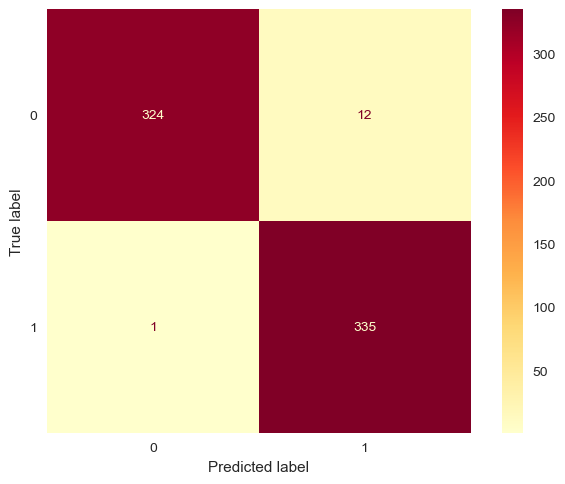

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, np.around(y_pred), cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

## Logistic Regression

In [84]:
lr = LogisticRegression(random_state=0, max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {:0.5f}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 59.67%
Acurácia: 65.77000%


In [85]:
acc_lr = accuracy_score(y_test, y_pred)
acc_lr

0.6577380952380952

### Métricas de classificação (Precision, recall, f1-score, support)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.34      0.50       336
           1       0.60      0.97      0.74       336

    accuracy                           0.66       672
   macro avg       0.76      0.66      0.62       672
weighted avg       0.76      0.66      0.62       672



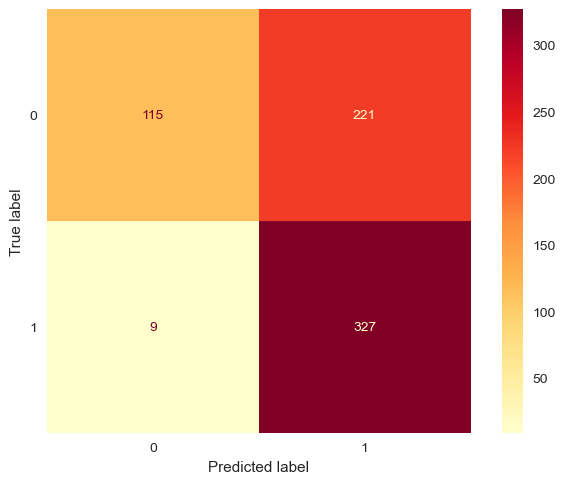

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

## Random Forest

In [88]:
# Cria o modelo e treina o Algoritmo com os dados de treino
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [89]:
# Predição dos dados
y_pred = rf.predict(X_test)

In [90]:
# Validando a Maquina Preditiva - Verificando o nível de Acurácia da Máquina Preditiva
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 97.38%
Acurácia: 98.36%


In [91]:
acc_rf = accuracy_score(y_test, y_pred)
acc_rf

0.9836309523809523

### Métricas de classificação (Precision, recall, f1-score, support)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       336
           1       0.97      0.99      0.98       336

    accuracy                           0.98       672
   macro avg       0.98      0.98      0.98       672
weighted avg       0.98      0.98      0.98       672



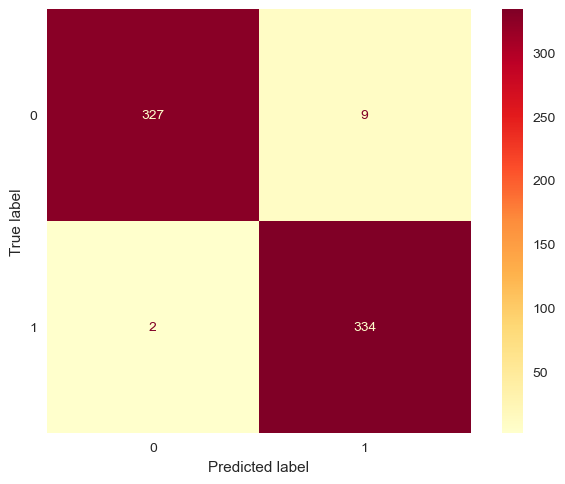

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

## KNN (K-Nearest Neighbors

- Considerou-se testar algumas métricas e outros parâmetros em (K, alpha, hidden_layers_sizes)

<hr />

#### Parameter K = 3 e metric = minkowski

<hr />

In [94]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
# Predição dos dados
y_pred = knn.predict(X_test)

In [95]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.48%
Acurácia: 97.17%


In [96]:
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.9717261904761905

### Métricas de classificação (Precision, recall, f1-score, support)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       336
           1       0.96      0.98      0.97       336

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



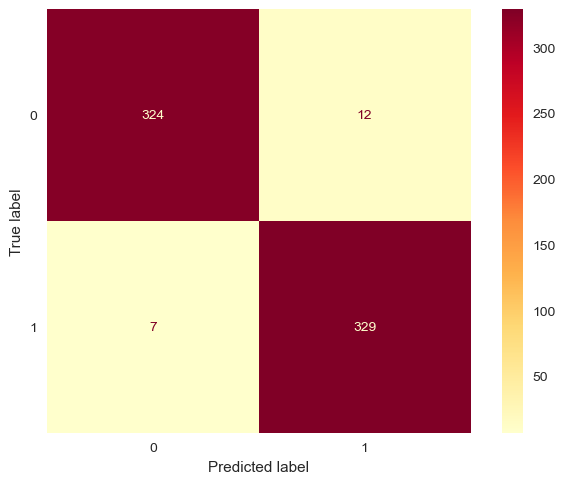

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

<hr />

#### Parameter K = 10 e metric = minkowski

<hr />

In [99]:
# Construir Modelo e Treinar Dados
knn_2 = KNeighborsClassifier(n_neighbors=10)
knn_2.fit(X_train, y_train)
# Aplicar Modelo aos Dados de Validação
y_pred = knn.predict(X_test)

In [100]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.48%
Acurácia: 97.17%


In [101]:
acc_knn_2 = accuracy_score(y_test, y_pred)
acc_knn_2

0.9717261904761905

### Métricas de classificação (Precision, recall, f1-score, support)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       336
           1       0.96      0.98      0.97       336

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



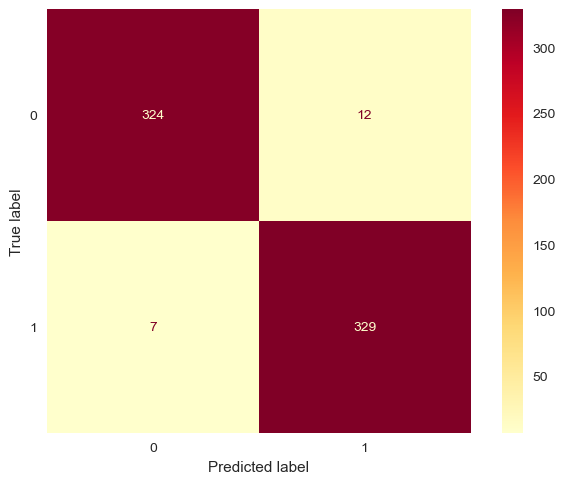

In [103]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

<hr />

#### Parameter K = 3 e metric = euclidean

<hr />

In [104]:
knc = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knc.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.48%
Acurácia: 97.17%


In [105]:
acc_knc = accuracy_score(y_test, y_pred)
acc_knc

0.9717261904761905

### Métricas de classificação (Precision, recall, f1-score, support)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       336
           1       0.96      0.98      0.97       336

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



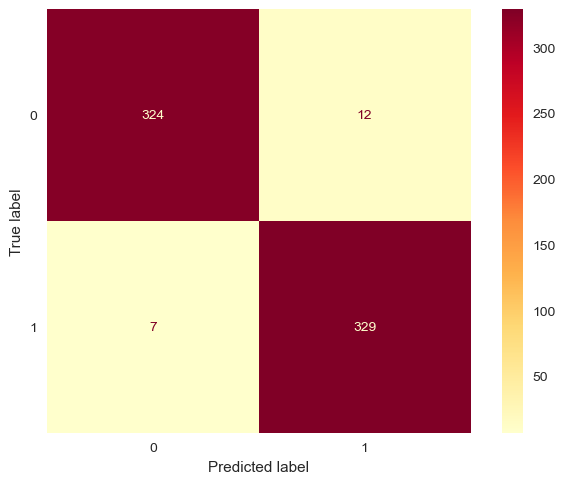

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

<hr />

#### Parameter K = 10 e metric = euclidean

<hr />

In [108]:
knc_2 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knc_2.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.48%
Acurácia: 97.17%


In [109]:
acc_knc_2 = accuracy_score(y_test, y_pred)
acc_knc_2

0.9717261904761905

### Métricas de classificação (Precision, recall, f1-score, support)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       336
           1       0.96      0.98      0.97       336

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



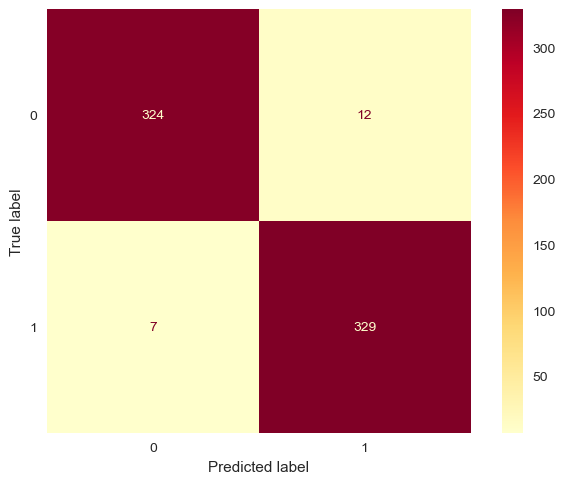

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

# Rede Neural MLP (Multi-layer Perceptron)

In [112]:
mlp = MLPClassifier().fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [113]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 95.74000000000001%
Acurácia: 94.78999999999999%


In [114]:
acc_mlp = accuracy_score(y_test, y_pred)
acc_mlp

0.9479166666666666

### Métricas de classificação (Precision, recall, f1-score, support)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       336
           1       0.96      0.94      0.95       336

    accuracy                           0.95       672
   macro avg       0.95      0.95      0.95       672
weighted avg       0.95      0.95      0.95       672



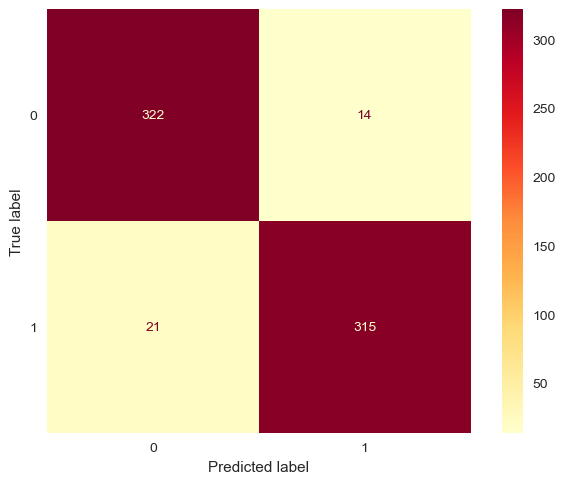

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

<hr />

#### Parâmetros - Alpha: 1 e hidden_layer_sizes diferentes: 10

<hr />

In [117]:
mlp_2 = MLPClassifier(hidden_layer_sizes=10, alpha=1).fit(X_train, y_train)
y_pred = mlp_2.predict(X_test)

In [118]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.06%
Acurácia: 95.24000000000001%


In [119]:
acc_mlp_2 = accuracy_score(y_test, y_pred)
acc_mlp_2

0.9523809523809523

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       336
           1       0.96      0.94      0.95       336

    accuracy                           0.95       672
   macro avg       0.95      0.95      0.95       672
weighted avg       0.95      0.95      0.95       672



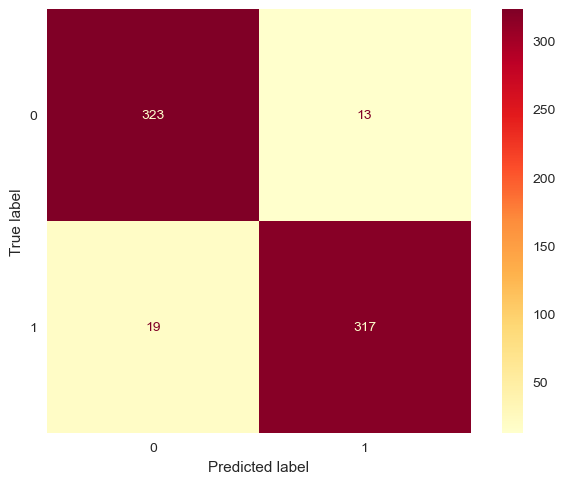

In [121]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

# SVM (Support Vector Machines)

In [122]:
# Cria o modelo
svm = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
svm.fit(X_train, y_train)
# Previsões
previsoes_v1 = svm.predict(X_test)

In [123]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, previsoes_v1),4)*100))

Precisão dos dados de teste: 96.06%
Acurácia: 85.11999999999999%


In [124]:
acc_svm = accuracy_score(y_test, previsoes_v1)
acc_svm

0.8511904761904762

In [125]:
print(classification_report(y_test, previsoes_v1))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83       336
           1       0.77      1.00      0.87       336

    accuracy                           0.85       672
   macro avg       0.89      0.85      0.85       672
weighted avg       0.89      0.85      0.85       672



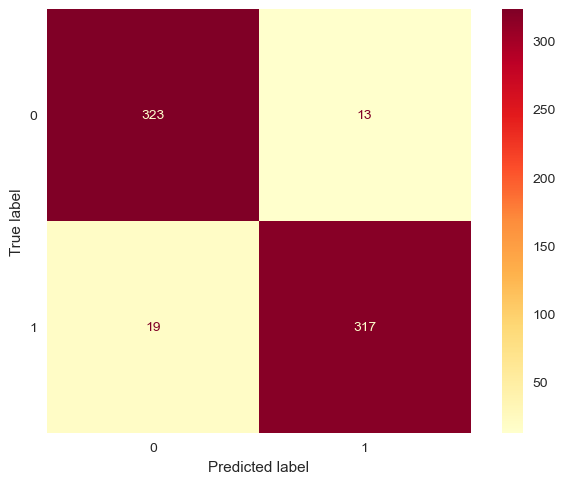

In [126]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

## Decision Trees

<hr />

#### Division Measures - Criterion: gini

<hr />

In [127]:
tree_1 = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')
tree_1.fit(X_train, y_train) # Gini
y_pred = tree_1.predict(X_test)

In [128]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 95.89%
Acurácia: 96.58%


In [129]:
acc_tree_1 = accuracy_score(y_test, y_pred)
acc_tree_1

0.9657738095238095

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       336
           1       0.96      0.97      0.97       336

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



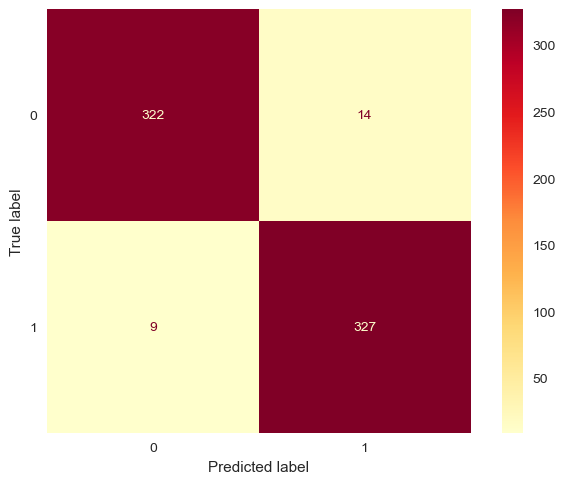

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

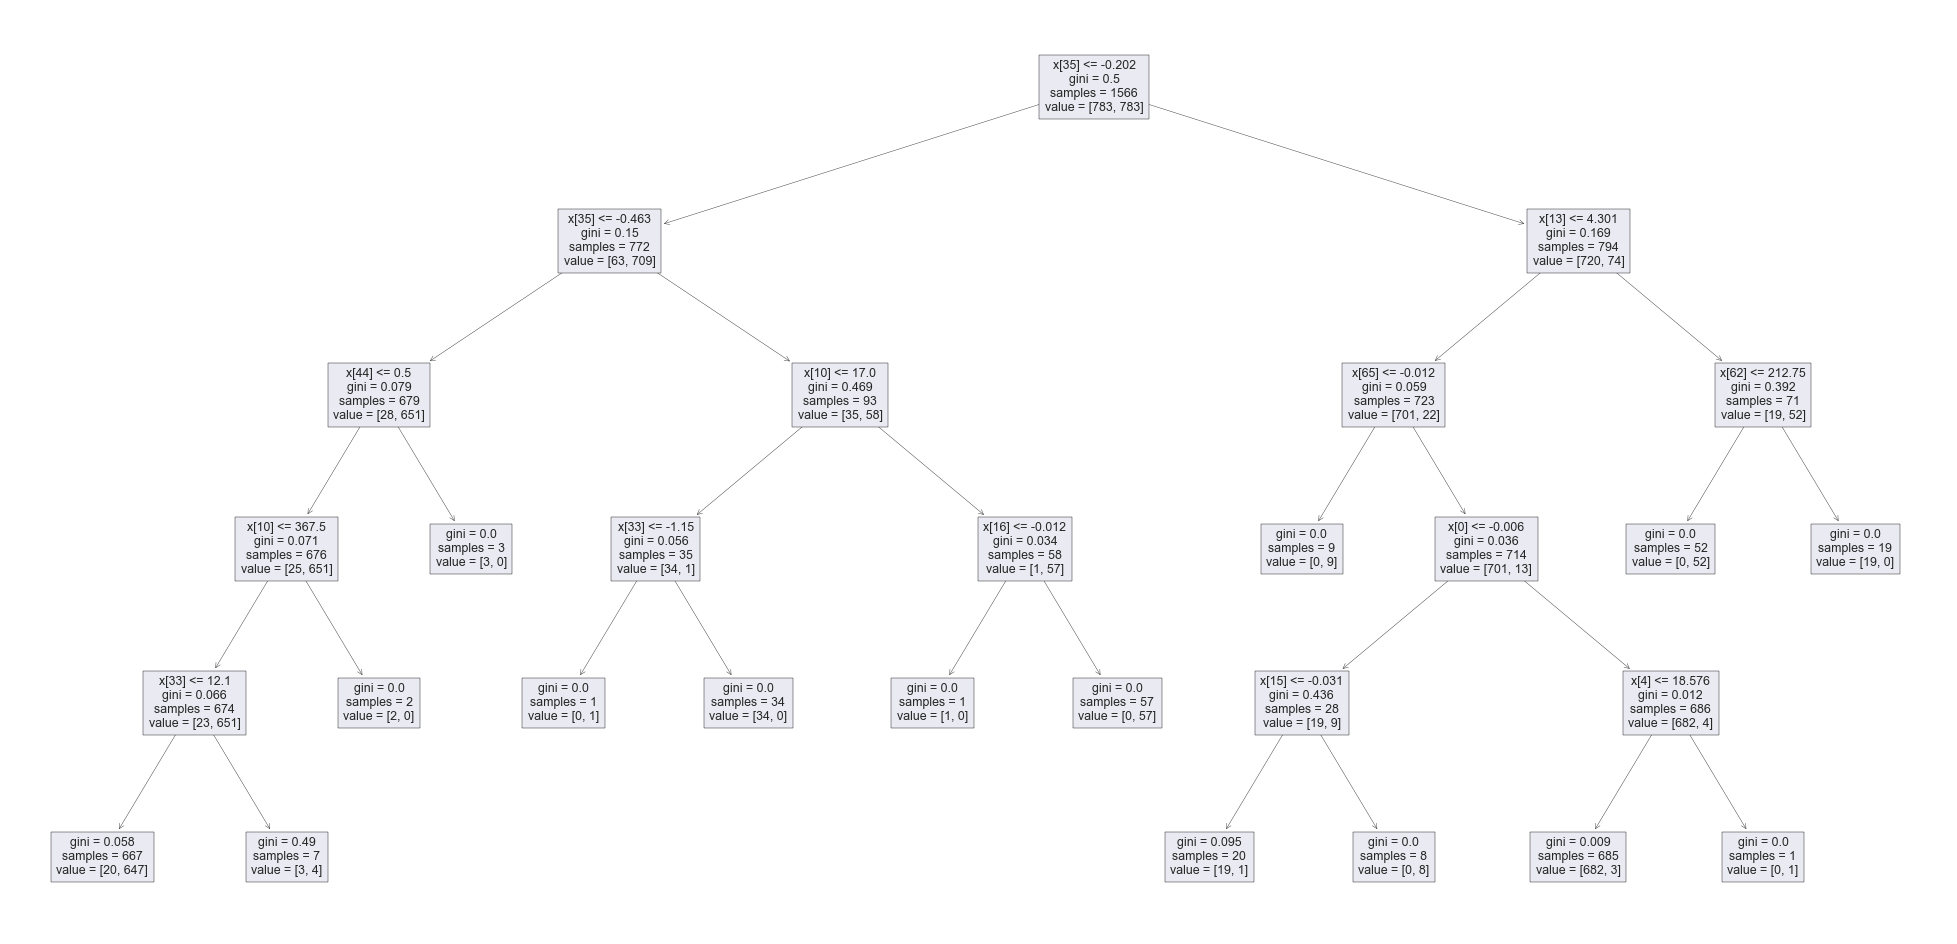

In [132]:
plt.figure(figsize=(25,12))
tree.plot_tree(tree_1, fontsize=8.9)
plt.show()

#### Division Measures - Criterion: entropy

In [133]:
tree_2 = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy').fit(X_train, y_train)# Entropy
y_pred = tree_2.predict(X_test)

In [134]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.36%
Acurácia: 95.54%


In [135]:
acc_tree_2 = accuracy_score(y_test, y_pred)
acc_tree_2

0.9553571428571429

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       336
           1       0.96      0.95      0.95       336

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672



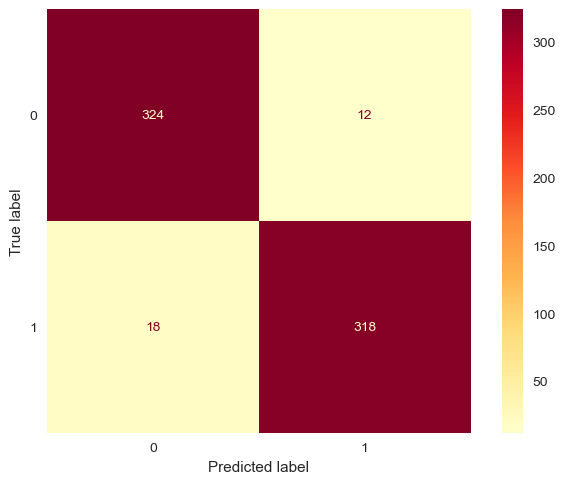

In [137]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

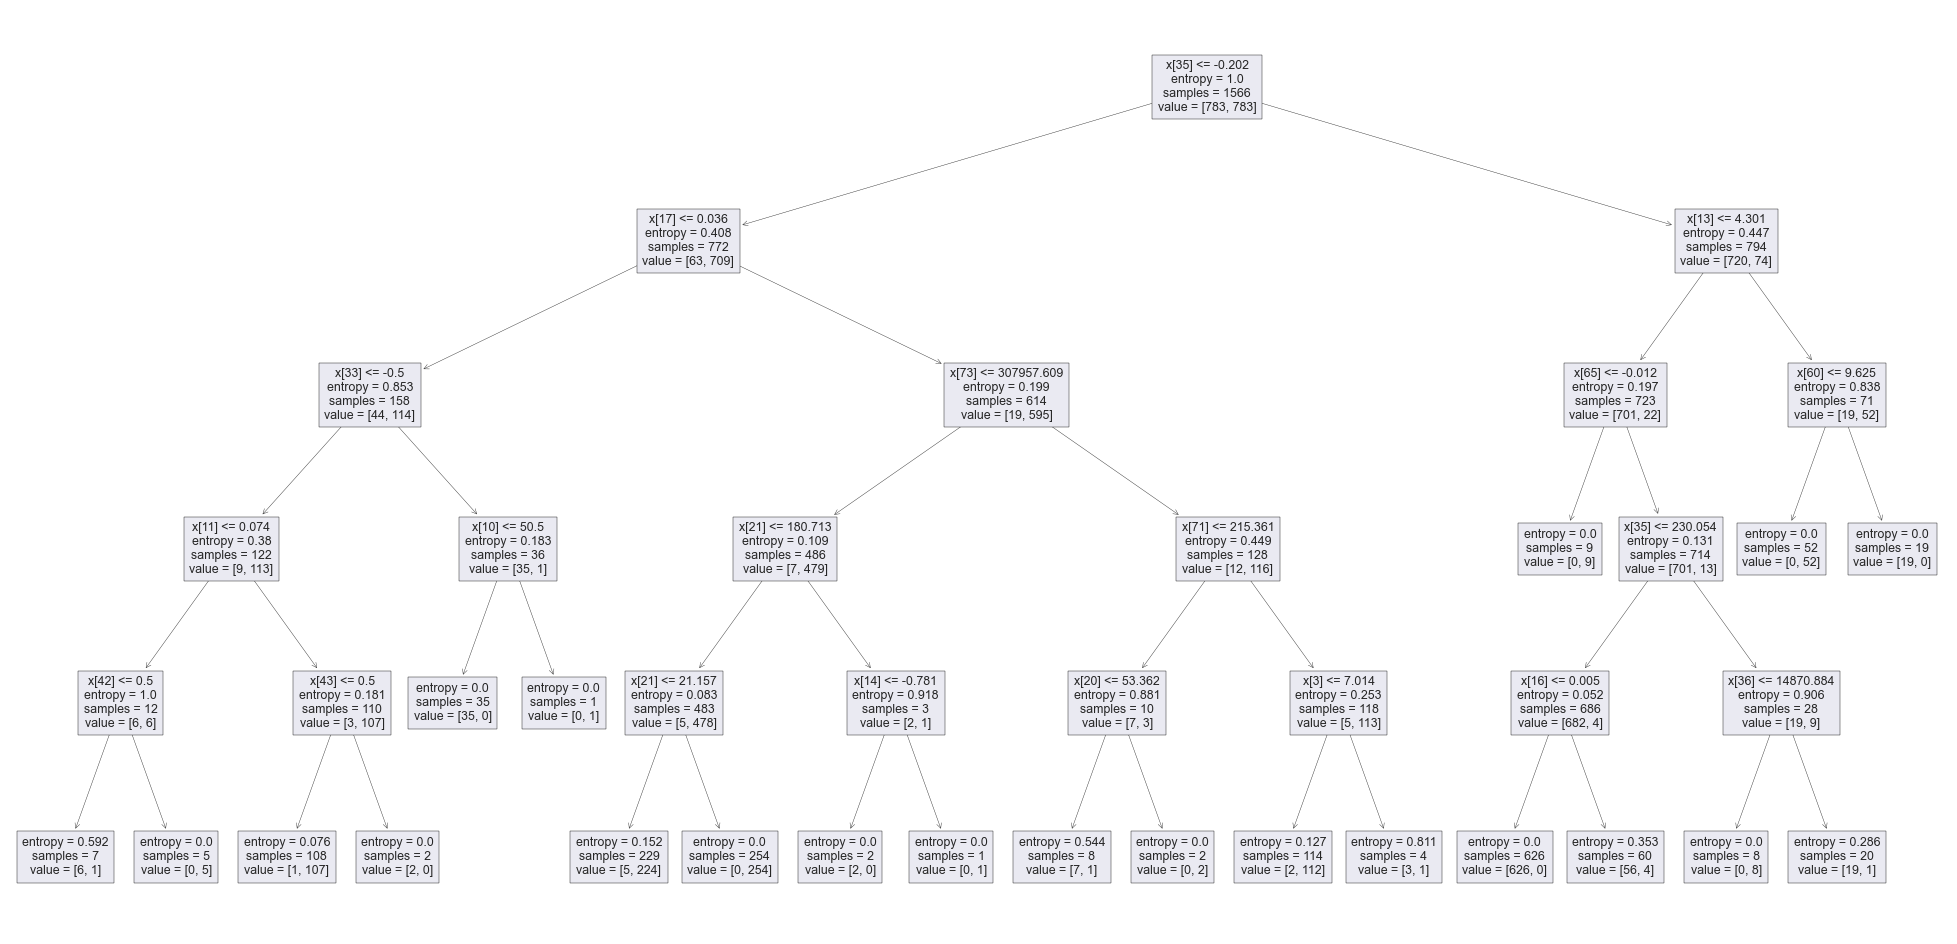

In [138]:
plt.figure(figsize=(25,12))
tree.plot_tree(tree_2, fontsize=8.9)
plt.show()

## Agrupando a tabela de modelos 

In [139]:
keras_model = {
    'keras': [
        acc
    ]
}


lr_model = {
    'lr': [
        acc_lr
    ]
}

rf_model = {
    'rf': [
        acc_rf
    ]
}

knn_model = {
    'knn': [
        acc_knn
    ]
}

mlp_model = {
    'mlp': [
        acc_mlp
    ]
}

svm_model = {
    'svm': [
        acc_svm
    ]
}


tree_model = {
    'tree_1': [
        acc_tree_1
    ]
}

In [140]:
models = pd.DataFrame()
collections = [keras_model, lr_model, rf_model, knn_model, mlp_model, svm_model, tree_model]

for collection in collections:
    models = pd.concat([models, pd.DataFrame.from_dict(collection).T])

models.columns = ['Accuracy']
models

,Accuracy
keras,0.980655
lr,0.657738
rf,0.983631
knn,0.971726
mlp,0.947917
svm,0.851190
tree_1,0.965774


<hr />

# Resultados

<hr />

Elenca todas as tabelas ordenadas por maior acurácia, apresentando a matriz de confusão para o modelo de maior acurácia.

In [141]:
models.sort_values(by=['Accuracy'], ascending=False)

,Accuracy
rf,0.983631
keras,0.980655
knn,0.971726
tree_1,0.965774
mlp,0.947917
svm,0.851190
lr,0.657738


### Matriz de Confusão do Melhor Modelo por acurácia (Random Forest)

In [142]:
y_pred = rf.predict(X_test)

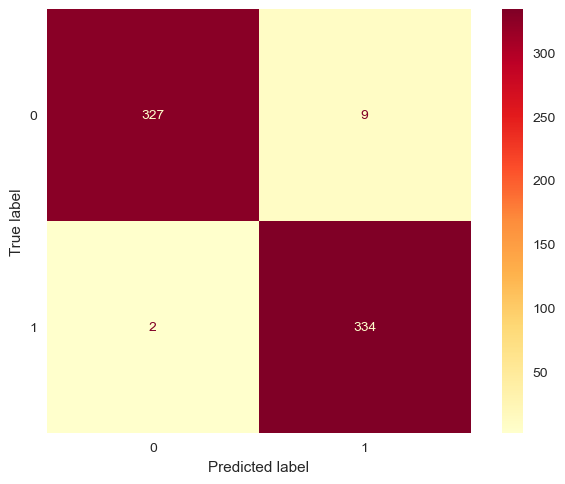

In [143]:
ConfusionMatrixDisplay.from_predictions(y_test, np.around(y_pred), cmap=plt.cm.YlOrRd)
plt.grid(False)
plt.show()

<strong>Observação:</strong>

Assim, nosso modelo de analise de tráfego <strong>com</strong> a técnica de balanceamento em seus valores reais que o modelo acertou:

- Previu das transações não fraudulentas 327 vezes corretamente;
- Previu das transações fraudulentas 334 vezes corretamente;

> Os demais são falsos positivos e negativos, onde na diagonal se consideram os valores reais que o modelo acertou corretamente

In [144]:
print('\n------------------- Relatorio de classificacao -------------------')
print(classification_report(y_test, np.around(y_pred)))


------------------- Relatorio de classificacao -------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       336
           1       0.97      0.99      0.98       336

    accuracy                           0.98       672
   macro avg       0.98      0.98      0.98       672
weighted avg       0.98      0.98      0.98       672



# Conclusão

<p style='text-align: justify;'>Os algoritmos foram avaliados em função das métricas (f1-score, precision, recall) e a acurácia do modelo. Onde considerou-se o modelo que obtivesse melhor acurácia para a escolha de melhor desempenho. Embora todos os modelos tenham apresentado bons resultados, o que teve melhor desempenho por conveniência foi o de <strong>Random Forest</strong>, realizado com as bibliotecas <strong>scikit-learn</strong>, tendo apresentado uma <strong>acurácia de 98,36%</strong>, embora o <strong>Keras</strong> na categoria de <strong>Redes Neurais</strong> realizado com as bibliotecas <strong>Keras/TensorFlow</strong>, em segundo lugar tenha apresentado diferenciação mínima na acurácia do modelo de <strong>98,06%</strong>. Em contrapartida, o modelo mais simples de <strong>Regressão Logística</strong> apresentou um desempenho mais abaixo que os demais.</p>